# Imports

In [ ]:
# builtin import
import time
import re
import os
from builtins import str
from dotenv import load_dotenv
load_dotenv()

# data import
import pandas as pd
import numpy as np

# plot import
import seaborn as sns
from matplotlib import pyplot as plt

# error import
from tenacity import retry, stop_after_attempt, wait_exponential

# Data Extraction

## Synthetizing Function

In [44]:
# # convert excel data into function with parameters, description, output
# url = 'C:/Users/julio/Desktop/dev/artificial-intelligence/projects/function_call/data/excel_data.xlsx'
# excel_df = pd.read_excel(url)

# excel_df.head()

In [45]:
# for idx, row in excel_df.iterrows():
#     if row['Musician Command'] in [
#         '"Save take"', '"New take"', '"Mark verse"', '"Mark chorus"', '"Mark solo"', '"Mark bridge"', '"Mark intro"', '"Mark outro"'
#         ]:
#             print(row['Musician Command'])

In [46]:
# [row['Musician Command'] for _, row in excel_df.iterrows() if row['Musician Command'] not in [
#             "Save take", "New take", "Mark verse", "Mark chorus", "Mark solo", "Mark bridge", "Mark intro", "Mark outro"
#             ]
# ]

In [47]:
# dict_data = [
#     (
#         f"""def {''.join(list(row['Musician Command'])[1:-1]).lower().replace(' ', '_')}() -> None:
#     '''{str(row['Description'] if not pd.isna(row['Description']) else '')}{row['Notes'] if not pd.isna(row['Notes']) else ''}
#     {row['Command Variations'] if not pd.isna(row['Command Variations']) else ''}'''
#     print('{row['Moises Dummy Function'] if not pd.isna(row['Moises Dummy Function']) else ''}')\n"""
#     )
#     for _, row in excel_df.iterrows() 
#         if row['Musician Command'] not in [
#             '"Save take"', '"New take"', '"Mark verse"', '"Mark chorus"', '"Mark solo"', '"Mark bridge"', '"Mark intro"', '"Mark outro"'
#             ]
# ]

# dict_data

In [48]:
# for string_data in dict_data:
#     print(string_data)

## Command Classification

In [ ]:
# # convert excel data into function with parameters, description, output
# url = 'C:/Users/julio/Desktop/dev/artificial-intelligence/projects/function_call/data/excel_data.xlsx'
# excel_df = pd.read_excel(url)

# excel_df.head()

,Musician Command,Description,Notes,Command Variations,Moises Dummy Function,Parameters,Category,Context,Priority,Platforms
0,"""Play""",Start playback of the current track from where...,Most common command,"""Begin"", ""Start"", ""Hit it"", ""Let's roll"", ""Dro...",player.play(),NaN,Playback,Universal,High,All
1,"""Pause""",Pause the currently playing music track. This ...,Second most common command,"""Stop"", ""Cut it"", ""Hold up"", ""Break"", ""Hang on...",player.pause(),NaN,Playback,Universal,High,All
2,"""From the top""",Restart the current track from its beginning w...,Return to start of track,"""Top it"", ""Start over"", ""Run it again"", ""Let'...",player.seek(0),NaN,Navigation,Practice,High,All
3,"""Go back""",Rewind the current track by a preset interval....,Default 10 seconds back,"""Run that back"", ""Take it back"", ""Rewind that""...",player.seek(currentTime-10),seconds=10,Navigation,Practice,High,All
4,"""Skip ahead""",Advance the playback by a specified interval o...,Default 10 seconds forward,"""Jump to the next bit"", ""Fast forward"", ""Push ...",player.seek(currentTime+10),seconds=10,Navigation,Practice,Medium,All


In [ ]:
# # commands category dict
# cmd_category = {}
# for idx, row in excel_df.iterrows():
#     main_cmd = row['Musician Command']
#     main_cmd_processed = str(main_cmd[1:-1]).lower() # remove quotations and turn into lowercase
#     cmd_category[main_cmd_processed] = [main_cmd_processed]
#     cmd_variations = [
#         (str(cmd_str).replace('"', '').lower()) if idx == 0 else (str(cmd_str).replace('"', '').lower()[1:])
#         for idx, cmd_str in enumerate(row['Command Variations'].split(','))
#         ]
#     cmd_category[main_cmd_processed].append(cmd_variations)

# cmd_category

{'play': ['play',
  ['begin',
   'start',
   'hit it',
   "let's roll",
   'drop in',
   'count it off',
   'kick it',
   'take it away',
   'da capo',
   'start again']],
 'pause': ['pause',
  ['stop',
   'cut it',
   'hold up',
   'break',
   'hang on',
   'freeze',
   'time out',
   'cut',
   'kill it',
   'shut it down']],
 'from the top': ['from the top',
  ['top it',
   'start over',
   ' run it again',
   "let's take it again",
   'from the start',
   'go again',
   'from the beggining']],
 'go back': ['go back',
  ['run that back',
   'take it back',
   'rewind that',
   'let me hear that again',
   'bump that back',
   'one more time on that',
   'back up a bit']],
 'skip ahead': ['skip ahead',
  ['jump to the next bit', 'fast forward', 'push ahead', 'skip that part']],
 'slow down': ['slow down',
  ['take it down a notch',
   'ease up',
   'pull back',
   'drag it',
   'chill the tempo',
   'throw some molasses on it',
   'bring it down',
   'not so eager']],
 'slow down a lo

In [ ]:
# cmd_cat_difficulty = {}
# for k, v in cmd_category.items():
#     cmd_cat_difficulty[k] = {
#         'eazy': [],
#         'medium': [],
#         'hard': []
#     }
#     fn_name = v[0]
#     list_cmds = [fn_name] + v[1]
#     for cmd in list_cmds:
#         # similarity = Levenshtein.ratio(fn_name, cmd)
#         length = len(str(re.sub(r'[^a-zA-Z]' ,' ', cmd)).split(' '))
#         if length > 2:
#             cmd_cat_difficulty[k]['hard'].append(cmd)
#         elif length > 1:
#             cmd_cat_difficulty[k]['medium'].append(cmd)
#         else:
#             cmd_cat_difficulty[k]['eazy'].append(cmd)
#     # print(cmd_cat_difficulty)
#     # break

# cmd_cat_difficulty

{'play': {'eazy': ['play', 'begin', 'start'],
  'medium': ['hit it', 'drop in', 'kick it', 'da capo', 'start again'],
  'hard': ["let's roll", 'count it off', 'take it away']},
 'pause': {'eazy': ['pause', 'stop', 'break', 'freeze', 'cut'],
  'medium': ['cut it', 'hold up', 'hang on', 'time out', 'kill it'],
  'hard': ['shut it down']},
 'from the top': {'eazy': [],
  'medium': ['top it', 'start over', 'go again'],
  'hard': ['from the top',
   ' run it again',
   "let's take it again",
   'from the start',
   'from the beggining']},
 'go back': {'eazy': [],
  'medium': ['go back', 'rewind that'],
  'hard': ['run that back',
   'take it back',
   'let me hear that again',
   'bump that back',
   'one more time on that',
   'back up a bit']},
 'skip ahead': {'eazy': [],
  'medium': ['skip ahead', 'fast forward', 'push ahead'],
  'hard': ['jump to the next bit', 'skip that part']},
 'slow down': {'eazy': [],
  'medium': ['slow down', 'ease up', 'pull back', 'drag it'],
  'hard': ['take i

# Function Setup

## Method Definition

In [3]:
def play() -> None:
    '''Start playback of the current track from where the seekbar is positioned.
    This is one of the most common intent used for initiating music playback.
    Commands (First command is mostly the most common): "Play", "Begin", "Start", "Hit it", "Let's roll", "Drop in", "Count it off", "Kick it", "Take it away", "Da capo", "Start again"'''
    print('player.play()')

def pause() -> None:
    '''Pause the currently playing music track. This intent stops playback while maintaining the current position in the track.Second most common command
    Commands (First command is mostly the most common): "Pause", "Stop", "Cut it", "Hold up", "Break", "Hang on", "Freeze", "Time out", "Cut", "Kill it", "Shut it down"'''
    print('player.pause()')

def from_the_top() -> None:
    '''Restart the current track from its beginning without pausing. This command automatically repositions the seekbar to the start of the song. If the track is paused, it positions the seek bar in the beginning, and it triggers the play right after.Return to start of track
    Commands (First command is mostly the most common): "From the top", "Top it", "Start over",  "Run it again", "Let's take it again", "From the start", "Go again", "From the beggining"'''
    print(f'player.seek(0)')

def go_back(seconds: int) -> None:
    '''Rewind the current track by a preset interval. This intent moves the seekbar to an earlier point in the song.Default 10 seconds back
    Commands (First command is mostly the most common): "Go back", "Run that back", "Take it back", "Rewind that", "Let me hear that again", "Bump that back", "One more time on that", "Back up a bit"'''
    print(f'player.seek(currentTime-{seconds})')

def skip_ahead(seconds: int) -> None:
    '''Advance the playback by a specified interval or jump to a later point in the track. This intent moves the seekbar forward within the current song.Default 10 seconds forward
    Commands (First command is mostly the most common): "Skip ahead", "Jump to the next bit", "Fast forward", "Push ahead", "Skip that part"'''
    print(f'player.seek(currentTime+{seconds})')

def slow_down(bpm: int) -> None:
    '''Decrease the playback speed. This command reduces the tempo in BPMs.Default to reduce -10 BPM from the current BPM
    Commands (First command is mostly the most common): "Slow down", "Take it down a notch", "Ease up", "Pull back", "Drag it", "Chill the tempo", "Throw some molasses on it", "Bring it down", "Not so eager"'''
    print(f'audio.setBpm(currentBpm-{bpm})')

def slow_down_a_lot(bpm: int) -> None:
    '''Decrease the playback speed. This command reduces the tempo in BPMs.Default to reduce -20 BPM from the current BPM.
    Commands (First command is mostly the most common): "Slow down a lot", "Way back", "Crawl with it", "Snail's pace", "Take it way down", "Molasses mode", "Sloooooow motion", "Glacial pace", "Tortoise mode"'''
    print(f'audio.setBpm(currentBpm-{bpm})')

def half_speed() -> None:
    '''Decrease the playback speed. This command reduces the tempo in BPMs dramatically to half of the tempo.Set the current bpm by dividing the current bpm by 2
    Commands (First command is mostly the most common): "Half speed", "Cut it in half", "Give me 50", "Halftime feel", "Half-time", "Break it down", "Slow jam it", "Practice tempo"'''
    print(f'audio.setBpm(currentBpm/2)')

def speed_up(bpm: int) -> None:
    '''Increase the playback speed. This intent accelerates the tempo.Default to increase 10 BPM from the current BPM.
    Commands (First command is mostly the most common): "Speed up", "Push it", "Take it up", "Goose it", "More gas", "Pick up the pace", "Double-time feel", "Let's cook", "Give it some juice"'''
    print(f'audio.setBpm(currentBpm+{bpm})')

def normal_speed() -> None:
    '''Reset the tempo to it's original BPM.Reset to original tempo
    Commands (First command is mostly the most common): "Normal speed", "Back to one", "As written", "On the page", "In time", "Real time", "Back to tempo", "At speed", "How it goes"'''
    print(f'audio.setBpm(originalBpm)')

def set_tempo_by_percent(percentage: int) -> None:
    '''Set tempo to specific user speed setting.Specific tempo setting
    Commands (First command is mostly the most common): "Set tempo to specific percentage", "About specific percentage", "Take it to specific percentage", "Dial it to specific percentage", "Clock it at specific percentage"'''
    print(f'audio.setSpeed({percentage})')

def set_tempo_by_bpm(bpm: int) -> None:
    '''Set tempo to specific BPM requested by user.
    Commands (First command is mostly the most common): "Set tempo to specific number", "About specific number", "Take it to specific number", "Dial it to specific number", "Clock it at specific number", "specific number on the dial", "specific number click", "Knock it back to specific number"'''
    print(f'audio.setBpm({bpm})')

def loop_this_section(startTime: int, endTime: int) -> None:
    '''Activate loop on the current section
    Commands (First command is mostly the most common): "Loop this section", "Vamp on this", "Cycle this", "Round and round here", "Lather, rinse, repeat", "Work this bit", "Drill this", "Spin this", "Let it ride"'''
    print(f'player.setLoop({endTime-startTime})')

def go_to_chorus(sectionName: str) -> None:
    '''Seek forward to the nearest chorusNavigate to marked section
    Commands (First command is mostly the most common): "Go to chorus", "Take it to the hook", "Jump to the refrain", "Hit the chorus", "Straight to the hook", "Skip to the money part", "Get to the chorus"'''
    print(f'sections.jumpTo({sectionName})')

def go_to_verse(sectionName: str) -> None:
    '''Seek forward to the nearest verseNavigate to marked section
    Commands (First command is mostly the most common): "Go to verse", "Back to the verse", "Take it to the verse", "Hit the verse", "Jump to the lyrics", "Verse part", "Into the verse"'''
    print(f'sections.jumpTo({sectionName})')

def go_to_solo(sectionName: str) -> None:
    '''Seek forward to the nearest soloNavigate to marked section
    Commands (First command is mostly the most common): "Go to solo", "Hit the solo", "Take it to the lead", "Jump to the jam", "Solo time", "Lead section", "Get to the licks", "Break time"'''
    print(f'sections.jumpTo({sectionName})')

def loop_the_chorus(sectionName: str) -> None:
    '''Loop marked section
    Commands (First command is mostly the most common): "Loop the chorus", "Cycle the hook", "Round on the refrain", "Vamp on the chorus", "Work the hook", "Drill the chorus", "Hook on repeat", "Circle the chorus"'''
    print(f'sections.loop({sectionName})')

def loop_the_verse(sectionName: str) -> None:
    '''Loop marked section
    Commands (First command is mostly the most common): "Loop the verse", "Cycle the verse", "Round on the verse", "Vamp on the verse", "Woodshed the verse", "Drill the verse", "Verse on repeat"'''
    print(f'sections.loop({sectionName})')

def loop_the_solo(sectionName: str) -> None:
    '''Loop marked section
    Commands (First command is mostly the most common): "Loop the solo", "Cycle the solo", "Round on the lead", "Vamp on the solo", "Woodshed the licks", "Drill the lead", "Solo on repeat", "Jam section on loop"'''
    print(f'sections.loop({sectionName})')

def clear_loop() -> None:
    '''Remove active loop
    Commands (First command is mostly the most common): "Clear loop", "Kill the loop", "Stop cycling", "Break the loop", "One-shot it", "Straight through", "No more looping", "Linear playback"'''
    print('player.clearLoop()')

def isolate_vocals(stemType: str) -> None:
    '''Focus on vocal part
    Commands (First command is mostly the most common): "Isolate vocals", "Just vox", "Vocals up front", "Singer only", "Give me the vocalist", "Pull out the vox", "Lead vocal only", "Strip to vocals"'''
    print(f'stems.isolate({stemType})')

def isolate_guitar(stemType: str) -> None:
    '''Solo guitar track by muting all other tracksFocus on guitar part
    Commands (First command is mostly the most common): "Isolate guitar", "Just the axe", "Guitar only", "Six-string only", "Pull out the guitar", "Strings only", "Guit only", "Let me hear the guitar"'''
    print(f'stems.isolate({stemType})')

def isolate_bass(stemType: str) -> None:
    '''Solo bass by muting all other tracksFocus on bass part
    Commands (First command is mostly the most common): "Isolate bass", "Just the low end", "Bass only", "Bottom only", "Pull out the bass", "Low-end only", "Let me hear what's walking", "Just the groove"'''
    print(f'stems.isolate({stemType})')

def isolate_drums(stemType: str) -> None:
    '''Solo drums by muting all other tracksFocus on drum part
    Commands (First command is mostly the most common): "Isolate drums", "Just the kit", "Drums only", "Skins only", "Pull out the beat", "Percussion only", "Rhythm section", "Beat only"'''
    print(f'stems.isolate({stemType})')

def isolate_piano(stemType: str) -> None:
    '''Solo piano by muting all other tracks. If there is both a piano and keys track, mute solo the piano, leaving the keys mute.Focus on piano part
    Commands (First command is mostly the most common): "Isolate piano", "Just the keys", "Piano only", "Ivories only", "Pull out the keys", "Keys only", "Let me hear the piano", "Just the chord comps"'''
    print(f'stems.isolate({stemType})')

def remove_vocals(stemType: str) -> None:
    '''Mute the vocal track, keeping all of the other tracks unchanged.For vocal practice with backing
    Commands (First command is mostly the most common): "Remove vocals", "Drop the vox", "Scratch track", "Backing only", "Pull the singer", "Track only", "Minus one", "Karaoke mode"'''
    print(f'stems.mute({stemType})')

def turn_down_drums(stemType: str, volume: int) -> None:
    '''Change the drum track volume. Reduce drum volume by increments of specific number
    Commands (First command is mostly the most common): "Turn down drums", "Ease off the kit", "Bury the drums a bit", "Drums in the back", "Less thump", "Easy on the skins", "Pull back the beat", "Drums too hot"'''
    print(f'stems.setVolume({stemType}, CurrentVol+{volume})')

def turn_up_bass(stemType: str, volume: int) -> None:
    '''Change the bass track volume. Increase bass volume by increments of specific number
    Commands (First command is mostly the most common): "Turn up bass", "More bottom", "Pump the bass", "Beef up the low end", "Bass in the face", "Fatten the bottom", "Give me more groove", "Thump it up"'''
    print(f'stems.setVolume({stemType}, CurrentVol-{volume})')

def reset_mix() -> None:
    '''Reset all volumes from the mix back to the default volume of all tracksReset all stem volumes
    Commands (First command is mostly the most common): "Reset mix", "Flatten the faders", "Back to the board", "Zero the mix", "Default balance", "Level the mix", "Reset the balance", "Home position"'''
    print('stems.resetMix()')

def show_all_instruments() -> None:
    '''Unmute all instruments, keeping the current volume.Show all instrument stems
    Commands (First command is mostly the most common): "Show all instruments", "Full band", "Everything in", "All players", "Full mix", "Bring it all back", "Stack it all", "Full ensemble"'''
    print('stems.showAll()')

def metronome_on() -> None:
    '''Enable metronome
    Commands (First command is mostly the most common): "Metronome on", "Click track", "Give me the click", "Click in", "Gimme some time", "Drop the metronome", "Beat keeper", "Time keeper"'''
    print(f'metronome.enable(True)')

def metronome_off() -> None:
    '''Disable metronome
    Commands (First command is mostly the most common): "Metronome off", "Kill the click", "No click", "Click out", "Ditch the metronome", "Free time", "Off the grid", "No more tick-tock"'''
    print(f'metronome.enable()')

def set_metronome_by_bpm(bpm: int) -> None:
    '''Set specific metronome tempo
    Commands (First command is mostly the most common): "Set metronome to specific number", "Click at specific number", "Tempo specific number", "specific number on the dial", "Clock it at specific number", "Quarter = specific number", "specific number clicks", "specific number on the metro"'''
    print(f'metronome.setTempo({bpm})')

def count_in(bars: int) -> None:
    '''Add count-in before playing
    Commands (First command is mostly the most common): "Count in", "Count me off", "Give me four", "Count it in", "Kick me in", "Four clicks in", "Lead-in count", "Click me in"'''
    print(f'player.countIn({4 if bars == None else bars})')

def record_take() -> None:
    '''Start recording performance
    Commands (First command is mostly the most common): "Record take", "Lay it down", "Roll on this", "Drop a take", "Capture this", "Hit record", "Take it", "Get this on tape", "Track this"'''
    print('recorder.start()')

def stop_recording() -> None:
    '''Stop current recording, when the user say below command:
    Commands (First command is mostly the most common): "Stop recording", "That's a take", "Cut the tape", "Got it", "In the can", "That's the one", "Print it", "End of take", "That's a wrap"'''
    print('recorder.stop()')

def compare_takes() -> None:
    '''Compare multiple recordings
    Commands (First command is mostly the most common): "Compra takes", "Let's hear the takes", "A/B them", "Which one's better", "Play the options", "Take check", "Run the versions", "Let's hear what we got"'''
    print('practice.compareTakes()')

def transpose_up(positive_semitones: int) -> None:
    '''Transpose up by 1 semitone
    Commands (First command is mostly the most common): "Transpose up", "Bump it up", "Kick it up a half", "Up a semi", "Step it up", "Push it up", "Nudge it up", "Half-step up"'''
    print(f'audio.transpose({1 if positive_semitones == None else positive_semitones})')

def transpose_down(negative_semitones: int) -> None:
    '''Transpose down by 1 semitone
    Commands (First command is mostly the most common): "Transpose down", "Take it down", "Drop it a half", "Down a semi", "Step it down", "Nudge it down", "Half-step down", "Bring it down"'''
    print(f'audio.transpose({-1 if negative_semitones == None else negative_semitones})')

def transpose_up_a_whole_step(positive_semitones: int) -> None:
    '''Transpose up by 2 semitones
    Commands (First command is mostly the most common): "Transpose up a whole step", "Up a tone", "Whole step up", "Up two", "Bump it up a whole", "Two frets up", "Major second up", "Step it up a whole"'''
    print(f'audio.transpose({2 if positive_semitones == None else positive_semitones})')

def transpose_down_a_whole_step(negative_semitones: int) -> None:
    '''Transpose down by 2 semitones
    Commands (First command is mostly the most common): "Transpose down a whole step", "Down a tone", "Whole step down", "Down two", "Bump it down a whole", "Two frets down", "Major second down", "Step it down a whole"'''
    print(f'audio_transpose({-2 if negative_semitones == None else negative_semitones})')

## FNS Definition

In [4]:
audio_fns = [ 
                play, pause, from_the_top, go_back, skip_ahead, slow_down, slow_down_a_lot, half_speed, speed_up, normal_speed, 
             set_tempo_by_percent, set_tempo_by_bpm, loop_this_section, go_to_chorus, go_to_verse, go_to_solo, loop_the_chorus, 
             loop_the_verse, loop_the_solo, clear_loop, isolate_vocals, isolate_guitar, isolate_bass, isolate_drums, isolate_piano, 
             remove_vocals, turn_down_drums, turn_up_bass, reset_mix, show_all_instruments, metronome_on, metronome_off, 
             set_metronome_by_bpm, count_in, record_take, stop_recording, compare_takes, transpose_up, transpose_down, 
             transpose_up_a_whole_step, transpose_down_a_whole_step 
             ]

audio_cmd = [str(fn.__name__).replace('_', ' ') for fn in audio_fns]

audio_cmd[:5]

['play', 'pause', 'from the top', 'go back', 'skip ahead']

## FNS (OpenAI)

In [ ]:
moises_fns_openai = [
    {   
        "type": "function",
        "function": {
        "name": "play",
        "description": "Start playback of the current track from where the seekbar is positioned. This is one of the most common intents used for initiating music playback.",
        "parameters": {
            "type": "object",
            "properties": {},
            "required": [],}
        },
    },
    {   
        "type": "function",
        "function": {
        "name": "pause",
        "description": "Pause the currently playing music track. This intent stops playback while maintaining the current position in the track.",
        "parameters": {
            "type": "object",
            "properties": {},
            "required": [],}
        },
    },
    {   
        "type": "function",
        "function": {
        "name": "from_the_top",
        "description": "Restart the current track from its beginning without pausing. This command automatically repositions the seekbar to the start of the song.",
        "parameters": {
            "type": "object",
            "properties": {},
            "required": [],}
        },
    },
    {   
        "type": "function",
        "function": {
        "name": "go_back",
        "description": "Rewind the current track by a preset interval. This intent moves the seekbar to an earlier point in the song.",
        "parameters": {
            "type": "object",
            "properties": {
                "seconds": {
                    "type": "integer",
                    "description": "Number of seconds to rewind.",
                }
            },
            "required": ["seconds"],}
        },
    },
    {   
        "type": "function",
        "function": {
        "name": "skip_ahead",
        "description": "Advance the playback by a specified interval or jump to a later point in the track. This intent moves the seekbar forward within the current song.",
        "parameters": {
            "type": "object",
            "properties": {
                "seconds": {
                    "type": "integer",
                    "description": "Number of seconds to skip ahead.",
                }
            },
            "required": ["seconds"],}
        },
    },
    {   
        "type": "function",
        "function": {
        "name": "slow_down",
        "description": "Decrease the playback speed. This command reduces the tempo in BPMs.",
        "parameters": {
            "type": "object",
            "properties": {
                "bpm": {
                    "type": "integer",
                    "description": "Number of BPMs to reduce from the current tempo.",
                }
            },
            "required": ["bpm"],}
        },
    },
    {   
        "type": "function",
        "function": {
        "name": "slow_down_a_lot",
        "description": "Decrease the playback speed. This command reduces the tempo in BPMs dramatically.",
        "parameters": {
            "type": "object",
            "properties": {
                "bpm": {
                    "type": "integer",
                    "description": "Number of BPMs to reduce from the current tempo.",
                }
            },
            "required": ["bpm"],}
        },
    },
    {   
        "type": "function",
        "function": {
        "name": "half_speed",
        "description": "Decrease the playback speed. This command reduces the tempo in BPMs dramatically to half of the tempo.",
        "parameters": {
            "type": "object",
            "properties": {},
            "required": [],}
        },
    },
    {   
        "type": "function",
        "function": {
        "name": "speed_up",
        "description": "Increase the playback speed. This intent accelerates the tempo.",
        "parameters": {
            "type": "object",
            "properties": {
                "bpm": {
                    "type": "integer",
                    "description": "Number of BPMs to increase from the current tempo.",
                }
            },
            "required": ["bpm"],}
        },
    },
    {   
        "type": "function",
        "function": {
        "name": "normal_speed",
        "description": "Reset the tempo to its original BPM.",
        "parameters": {
            "type": "object",
            "properties": {},
            "required": [],}
        },
    },
    {   
        "type": "function",
        "function": {
        "name": "set_tempo_by_percent",
        "description": "Set tempo to a specific user speed setting.",
        "parameters": {
            "type": "object",
            "properties": {
                "percentage": {
                    "type": "integer",
                    "description": "Percentage of the original tempo to set.",
                }
            },
            "required": ["percentage"],}
        },
    },
    {   
        "type": "function",
        "function": {
        "name": "set_tempo_by_bpm",
        "description": "Set tempo to a specific BPM requested by the user.",
        "parameters": {
            "type": "object",
            "properties": {
                "bpm": {
                    "type": "integer",
                    "description": "Specific BPM to set.",
                }
            },
            "required": ["bpm"],}
        },
    },
    {   
        "type": "function",
        "function": {
        "name": "loop_this_section",
        "description": "Activate loop on the current section.",
        "parameters": {
            "type": "object",
            "properties": {
                "startTime": {
                    "type": "integer",
                    "description": "Start time of the section in seconds.",
                },
                "endTime": {
                    "type": "integer",
                    "description": "End time of the section in seconds.",
                },
            },
            "required": ["startTime", "endTime"],}
        },
    },
    {   
        "type": "function",
        "function": {
        "name": "go_to_chorus",
        "description": "Seek forward to the nearest chorus.",
        "parameters": {
            "type": "object",
            "properties": {
                "sectionName": {
                    "type": "string",
                    "description": "Name of the chorus section.",
                }
            },
            "required": ["sectionName"],}
        },
    },
    {   
        "type": "function",
        "function": {
        "name": "go_to_verse",
        "description": "Seek forward to the nearest verse.",
        "parameters": {
            "type": "object",
            "properties": {
                "sectionName": {
                    "type": "string",
                    "description": "Name of the verse section.",
                }
            },
            "required": ["sectionName"],}
        },
    },
    {   
        "type": "function",
        "function": {
        "name": "go_to_solo",
        "description": "Seek forward to the nearest solo.",
        "parameters": {
            "type": "object",
            "properties": {
                "sectionName": {
                    "type": "string",
                    "description": "Name of the solo section.",
                }
            },
            "required": ["sectionName"],}
        },
    },
    {   
        "type": "function",
        "function": {
        "name": "loop_the_chorus",
        "description": "Loop the marked chorus section.",
        "parameters": {
            "type": "object",
            "properties": {
                "sectionName": {
                    "type": "string",
                    "description": "Name of the chorus section.",
                }
            },
            "required": ["sectionName"],}
        },
    },
    {   
        "type": "function",
        "function": {
        "name": "loop_the_verse",
        "description": "Loop the marked verse section.",
        "parameters": {
            "type": "object",
            "properties": {
                "sectionName": {
                    "type": "string",
                    "description": "Name of the verse section.",
                }
            },
            "required": ["sectionName"],}
        },
    },
    {   
        "type": "function",
        "function": {
        "name": "loop_the_solo",
        "description": "Loop the marked solo section.",
        "parameters": {
            "type": "object",
            "properties": {
                "sectionName": {
                    "type": "string",
                    "description": "Name of the solo section.",
                }
            },
            "required": ["sectionName"],}
        },
    },
    {   
        "type": "function",
        "function": {
        "name": "clear_loop",
        "description": "Remove active loop.",
        "parameters": {
            "type": "object",
            "properties": {},
            "required": [],}
        },
    },
    {   
        "type": "function",
        "function": {
        "name": "isolate_vocals",
        "description": "Focus on the vocal part by muting all other tracks.",
        "parameters": {
            "type": "object",
            "properties": {
                "stemType": {
                    "type": "string",
                    "description": "Type of stem to isolate (e.g., 'vocals').",
                }
            },
            "required": ["stemType"],}
        },
    },
    {   
        "type": "function",
        "function": {
        "name": "isolate_guitar",
        "description": "Focus on the guitar part by muting all other tracks.",
        "parameters": {
            "type": "object",
            "properties": {
                "stemType": {
                    "type": "string",
                    "description": "Type of stem to isolate (e.g., 'guitar').",
                }
            },
            "required": ["stemType"],}
        },
    },
    {   
        "type": "function",
        "function": {
        "name": "isolate_bass",
        "description": "Focus on the bass part by muting all other tracks.",
        "parameters": {
            "type": "object",
            "properties": {
                "stemType": {
                    "type": "string",
                    "description": "Type of stem to isolate (e.g., 'bass').",
                }
            },
            "required": ["stemType"],}
        },
    },
    {   
        "type": "function",
        "function": {
        "name": "isolate_drums",
        "description": "Focus on the drum part by muting all other tracks.",
        "parameters": {
            "type": "object",
            "properties": {
                "stemType": {
                    "type": "string",
                    "description": "Type of stem to isolate (e.g., 'drums').",
                }
            },
            "required": ["stemType"],}
        },
    },
    {   
        "type": "function",
        "function": {
        "name": "isolate_piano",
        "description": "Focus on the piano part by muting all other tracks.",
        "parameters": {
            "type": "object",
            "properties": {
                "stemType": {
                    "type": "string",
                    "description": "Type of stem to isolate (e.g., 'piano').",
                }
            },
            "required": ["stemType"],}
        },
    },
    {   
        "type": "function",
        "function": {
        "name": "remove_vocals",
        "description": "Mute the vocal track, keeping all other tracks unchanged.",
        "parameters": {
            "type": "object",
            "properties": {
                "stemType": {
                    "type": "string",
                    "description": "Type of stem to mute (e.g., 'vocals').",
                }
            },
            "required": ["stemType"],}
        },
    },
    {   
        "type": "function",
        "function": {
        "name": "turn_down_drums",
        "description": "Reduce the drum track volume by a specified amount.",
        "parameters": {
            "type": "object",
            "properties": {
                "stemType": {
                    "type": "string",
                    "description": "Type of stem to adjust (e.g., 'drums').",
                },
                "volume": {
                    "type": "integer",
                    "description": "Amount to reduce the volume by.",
                },
            },
            "required": ["stemType", "volume"],}
        },
    },
    {   
        "type": "function",
        "function": {
        "name": "turn_up_bass",
        "description": "Increase the bass track volume by a specified amount.",
        "parameters": {
            "type": "object",
            "properties": {
                "stemType": {
                    "type": "string",
                    "description": "Type of stem to adjust (e.g., 'bass').",
                },
                "volume": {
                    "type": "integer",
                    "description": "Amount to increase the volume by.",
                },
            },
            "required": ["stemType", "volume"],}
        },
    },
    {   
        "type": "function",
        "function": {
        "name": "reset_mix",
        "description": "Reset all volumes from the mix back to the default volume of all tracks.",
        "parameters": {
            "type": "object",
            "properties": {},
            "required": [],}
        },
    },
    {   
        "type": "function",
        "function": {
        "name": "show_all_instruments",
        "description": "Unmute all instruments, keeping the current volume.",
        "parameters": {
            "type": "object",
            "properties": {},
            "required": [],}
        },
    },
    {   
        "type": "function",
        "function": {
        "name": "metronome_on",
        "description": "Enable the metronome.",
        "parameters": {
            "type": "object",
            "properties": {},
            "required": [],}
        },
    },
    {   
        "type": "function",
        "function": {
        "name": "metronome_off",
        "description": "Disable the metronome.",
        "parameters": {
            "type": "object",
            "properties": {},
            "required": [],}
        },
    },
    {   
        "type": "function",
        "function": {
        "name": "set_metronome_by_bpm",
        "description": "Set the metronome to a specific BPM.",
        "parameters": {
            "type": "object",
            "properties": {
                "bpm": {
                    "type": "integer",
                    "description": "Specific BPM to set the metronome to.",
                }
            },
            "required": ["bpm"],}
        },
    },
    {   
        "type": "function",
        "function": {
        "name": "count_in",
        "description": "Add a count-in before playing.",
        "parameters": {
            "type": "object",
            "properties": {
                "bars": {
                    "type": "integer",
                    "description": "Number of bars for the count-in.",
                }
            },
            "required": ["bars"],}
        },
    },
    {   
        "type": "function",
        "function": {
        "name": "record_take",
        "description": "Start recording a performance.",
        "parameters": {
            "type": "object",
            "properties": {},
            "required": [],}
        },
    },
    {   
        "type": "function",
        "function": {
        "name": "stop_recording",
        "description": "Stop the current recording.",
        "parameters": {
            "type": "object",
            "properties": {},
            "required": [],}
        },
    },
    {   
        "type": "function",
        "function": {
        "name": "compare_takes",
        "description": "Compare multiple recordings.",
        "parameters": {
            "type": "object",
            "properties": {},
            "required": [],}
        },
    },
    {   
        "type": "function",
        "function": {
        "name": "transpose_up",
        "description": "Transpose up by 1 semitone.",
        "parameters": {
            "type": "object",
            "properties": {
                "positive_semitones": {
                    "type": "integer",
                    "description": "Number of semitones to transpose up.",
                }
            },
            "required": ["positive_semitones"],}
        },
    },
    {   
        "type": "function",
        "function": {
        "name": "transpose_down",
        "description": "Transpose down by 1 semitone.",
        "parameters": {
            "type": "object",
            "properties": {
                "negative_semitones": {
                    "type": "integer",
                    "description": "Number of semitones to transpose down.",
                }
            },
            "required": ["negative_semitones"],}
        },
    },
    {   
        "type": "function",
        "function": {
        "name": "transpose_up_a_whole_step",
        "description": "Transpose up by 2 semitones.",
        "parameters": {
            "type": "object",
            "properties": {
                "positive_semitones": {
                    "type": "integer",
                    "description": "Number of semitones to transpose up.",
                }
            },
            "required": ["positive_semitones"],}
        },
    },
    {   
        "type": "function",
        "function": {
            "name": "transpose_down_a_whole_step",
            "description": "Transpose down by 2 semitones.",
            "parameters": {
                "type": "object",
                "properties": {
                    "negative_semitones": {
                        "type": "integer",
                        "description": "Number of semitones to transpose down.",
                    }
                },
                "required": ["negative_semitones"],}
            },
    },
]

## FNS (Claude)

In [57]:
moises_fns_claude = [
        {
    "name": "play",
    "description": "Start playback of the current track from where the seekbar is positioned. This is one of the most common intents used for initiating music playback.",
    "input_schema": {
        "type": "object",
        "properties": {},
        "required": []
    }
    },
        {
    "name": "pause",
    "description": "Pause the currently playing music track. This intent stops playback while maintaining the current position in the track.",
    "input_schema": {
        "type": "object",
        "properties": {},
        "required": []
    }
    },
        {
    "name": "from_the_top",
    "description": "Restart the current track from its beginning without pausing. This command automatically repositions the seekbar to the start of the song.",
    "input_schema": {
        "type": "object",
        "properties": {},
        "required": []
    }
    },
        {
    "name": "go_back",
    "description": "Rewind the current track by a preset interval. This intent moves the seekbar to an earlier point in the song.",
    "input_schema": {
        "type": "object",
        "properties": {
        "seconds": {
            "type": "integer",
            "description": "Number of seconds to rewind."
        }
        },
        "required": ["seconds"]
    }
    },
        {
    "name": "skip_ahead",
    "description": "Advance the playback by a specified interval or jump to a later point in the track. This intent moves the seekbar forward within the current song.",
    "input_schema": {
        "type": "object",
        "properties": {
        "seconds": {
            "type": "integer",
            "description": "Number of seconds to skip ahead."
        }
        },
        "required": ["seconds"]
    }
    },
        {
    "name": "slow_down",
    "description": "Decrease the playback speed. This command reduces the tempo in BPMs.",
    "input_schema": {
        "type": "object",
        "properties": {
        "bpm": {
            "type": "integer",
            "description": "Number of BPMs to reduce from the current tempo."
        }
        },
        "required": ["bpm"]
    }
    },
        {
    "name": "slow_down_a_lot",
    "description": "Decrease the playback speed. This command reduces the tempo in BPMs dramatically.",
    "input_schema": {
        "type": "object",
        "properties": {
        "bpm": {
            "type": "integer",
            "description": "Number of BPMs to reduce from the current tempo."
        }
        },
        "required": ["bpm"]
    }
    },
        {
    "name": "half_speed",
    "description": "Decrease the playback speed. This command reduces the tempo in BPMs dramatically to half of the tempo.",
    "input_schema": {
        "type": "object",
        "properties": {},
        "required": []
    }
    },
        {
    "name": "speed_up",
    "description": "Increase the playback speed. This intent accelerates the tempo.",
    "input_schema": {
        "type": "object",
        "properties": {
        "bpm": {
            "type": "integer",
            "description": "Number of BPMs to increase from the current tempo."
        }
        },
        "required": ["bpm"]
    }
    },
        {
    "name": "normal_speed",
    "description": "Reset the tempo to its original BPM.",
    "input_schema": {
        "type": "object",
        "properties": {},
        "required": []
    }
    },
        {
    "name": "set_tempo_by_percent",
    "description": "Set tempo to a specific user speed setting.",
    "input_schema": {
        "type": "object",
        "properties": {
        "percentage": {
            "type": "integer",
            "description": "Percentage of the original tempo to set."
        }
        },
        "required": ["percentage"]
    }
    },
        {
    "name": "set_tempo_by_bpm",
    "description": "Set tempo to a specific BPM requested by the user.",
    "input_schema": {
        "type": "object",
        "properties": {
        "bpm": {
            "type": "integer",
            "description": "Specific BPM to set."
        }
        },
        "required": ["bpm"]
    }
    },
        {
    "name": "loop_this_section",
    "description": "Activate loop on the current section.",
    "input_schema": {
        "type": "object",
        "properties": {
        "startTime": {
            "type": "integer",
            "description": "Start time of the section in seconds."
        },
        "endTime": {
            "type": "integer",
            "description": "End time of the section in seconds."
        }
        },
        "required": ["startTime", "endTime"]
    }
    },
        {
    "name": "go_to_chorus",
    "description": "Seek forward to the nearest chorus.",
    "input_schema": {
        "type": "object",
        "properties": {
        "sectionName": {
            "type": "string",
            "description": "Name of the chorus section."
        }
        },
        "required": ["sectionName"]
    }
    },
        {
    "name": "go_to_verse",
    "description": "Seek forward to the nearest verse.",
    "input_schema": {
        "type": "object",
        "properties": {
        "sectionName": {
            "type": "string",
            "description": "Name of the verse section."
        }
        },
        "required": ["sectionName"]
    }
    },
        {
    "name": "go_to_solo",
    "description": "Seek forward to the nearest solo.",
    "input_schema": {
        "type": "object",
        "properties": {
        "sectionName": {
            "type": "string",
            "description": "Name of the solo section."
        }
        },
        "required": ["sectionName"]
    }
    },
        {
    "name": "loop_the_chorus",
    "description": "Loop the marked chorus section.",
    "input_schema": {
        "type": "object",
        "properties": {
        "sectionName": {
            "type": "string",
            "description": "Name of the chorus section."
        }
        },
        "required": ["sectionName"]
    }
    },
        {
    "name": "loop_the_verse",
    "description": "Loop the marked verse section.",
    "input_schema": {
        "type": "object",
        "properties": {
        "sectionName": {
            "type": "string",
            "description": "Name of the verse section."
        }
        },
        "required": ["sectionName"]
    }
    },
        {
    "name": "loop_the_solo",
    "description": "Loop the marked solo section.",
    "input_schema": {
        "type": "object",
        "properties": {
        "sectionName": {
            "type": "string",
            "description": "Name of the solo section."
        }
        },
        "required": ["sectionName"]
    }
    },
        {
    "name": "clear_loop",
    "description": "Remove active loop.",
    "input_schema": {
        "type": "object",
        "properties": {},
        "required": []
    }
    },
        {
    "name": "isolate_vocals",
    "description": "Focus on the vocal part by muting all other tracks.",
    "input_schema": {
        "type": "object",
        "properties": {
        "stemType": {
            "type": "string",
            "description": "Type of stem to isolate (e.g., 'vocals')."
        }
        },
        "required": ["stemType"]
    }
    },
        {
    "name": "isolate_guitar",
    "description": "Focus on the guitar part by muting all other tracks.",
    "input_schema": {
        "type": "object",
        "properties": {
        "stemType": {
            "type": "string",
            "description": "Type of stem to isolate (e.g., 'guitar')."
        }
        },
        "required": ["stemType"]
    }
    },
        {
    "name": "isolate_bass",
    "description": "Focus on the bass part by muting all other tracks.",
    "input_schema": {
        "type": "object",
        "properties": {
        "stemType": {
            "type": "string",
            "description": "Type of stem to isolate (e.g., 'bass')."
        }
        },
        "required": ["stemType"]
    }
    },
        {
    "name": "isolate_drums",
    "description": "Focus on the drum part by muting all other tracks.",
    "input_schema": {
        "type": "object",
        "properties": {
        "stemType": {
            "type": "string",
            "description": "Type of stem to isolate (e.g., 'drums')."
        }
        },
        "required": ["stemType"]
    }
    },
        {
    "name": "isolate_piano",
    "description": "Focus on the piano part by muting all other tracks.",
    "input_schema": {
        "type": "object",
        "properties": {
        "stemType": {
            "type": "string",
            "description": "Type of stem to isolate (e.g., 'piano')."
        }
        },
        "required": ["stemType"]
    }
    },
        {
    "name": "remove_vocals",
    "description": "Mute the vocal track, keeping all other tracks unchanged.",
    "input_schema": {
        "type": "object",
        "properties": {
        "stemType": {
            "type": "string",
            "description": "Type of stem to mute (e.g., 'vocals')."
        }
        },
        "required": ["stemType"]
    }
    },
        {
    "name": "turn_down_drums",
    "description": "Reduce the drum track volume by a specified amount.",
    "input_schema": {
        "type": "object",
        "properties": {
        "stemType": {
            "type": "string",
            "description": "Type of stem to adjust (e.g., 'drums')."
        },
        "volume": {
            "type": "integer",
            "description": "Amount to reduce the volume by."
        }
        },
        "required": ["stemType", "volume"]
    }
    },
        {
    "name": "turn_up_bass",
    "description": "Increase the bass track volume by a specified amount.",
    "input_schema": {
        "type": "object",
        "properties": {
        "stemType": {
            "type": "string",
            "description": "Type of stem to adjust (e.g., 'bass')."
        },
        "volume": {
            "type": "integer",
            "description": "Amount to increase the volume by."
        }
        },
        "required": ["stemType", "volume"]
    }
    },
        {
    "name": "reset_mix",
    "description": "Reset all volumes from the mix back to the default volume of all tracks.",
    "input_schema": {
        "type": "object",
        "properties": {},
        "required": []
    }
    },
        {
    "name": "show_all_instruments",
    "description": "Unmute all instruments, keeping the current volume.",
    "input_schema": {
        "type": "object",
        "properties": {},
        "required": []
    }
    },
        {
    "name": "metronome_on",
    "description": "Enable the metronome.",
    "input_schema": {
        "type": "object",
        "properties": {},
        "required": []
    }
    },
        {
    "name": "metronome_off",
    "description": "Disable the metronome.",
    "input_schema": {
        "type": "object",
        "properties": {},
        "required": []
    }
    },
        {
    "name": "set_metronome_by_bpm",
    "description": "Set the metronome to a specific BPM.",
    "input_schema": {
        "type": "object",
        "properties": {
        "bpm": {
            "type": "integer",
            "description": "Specific BPM to set the metronome to."
        }
        },
        "required": ["bpm"]
    }
    },
        {
    "name": "count_in",
    "description": "Add a count-in before playing.",
    "input_schema": {
        "type": "object",
        "properties": {
        "bars": {
            "type": "integer",
            "description": "Number of bars for the count-in."
        }
        },
        "required": ["bars"]
    }
    },
        {
    "name": "record_take",
    "description": "Start recording a performance.",
    "input_schema": {
        "type": "object",
        "properties": {},
        "required": []
    }
    },
        {
    "name": "stop_recording",
    "description": "Stop the current recording.",
    "input_schema": {
        "type": "object",
        "properties": {},
        "required": []
    }
    },
        {
    "name": "compare_takes",
    "description": "Compare multiple recordings.",
    "input_schema": {
        "type": "object",
        "properties": {},
        "required": []
    }
    },
        {
    "name": "transpose_up",
    "description": "Transpose up by 1 semitone.",
    "input_schema": {
        "type": "object",
        "properties": {
        "positive_semitones": {
            "type": "integer",
            "description": "Number of semitones to transpose up."
        }
        },
        "required": ["positive_semitones"]
    }
    },
        {
    "name": "transpose_down",
    "description": "Transpose down by 1 semitone.",
    "input_schema": {
        "type": "object",
        "properties": {
        "negative_semitones": {
            "type": "integer",
            "description": "Number of semitones to transpose down."
        }
        },
        "required": ["negative_semitones"]
    }
    },
        {
    "name": "transpose_up_a_whole_step",
    "description": "Transpose up by 2 semitones.",
    "input_schema": {
        "type": "object",
        "properties": {
        "positive_semitones": {
            "type": "integer",
            "description": "Number of semitones to transpose up."
        }
        },
        "required": ["positive_semitones"]
    }
    },
        {
    "name": "transpose_down_a_whole_step",
    "description": "Transpose down by 2 semitones.",
    "input_schema": {
        "type": "object",
        "properties": {
        "negative_semitones": {
            "type": "integer",
            "description": "Number of semitones to transpose down."
        }
        },
        "required": ["negative_semitones"]
    }
    }
]

## FNS (Gemini)

### version 1

In [58]:
# # available functions
# v_audio_fns = [(''.join(list(name)[1:-1]).lower().replace(' ', '_')) for name in excel_df['Musician Command']
#     if name not in [
#             '"Save take"', '"New take"', '"Mark verse"', '"Mark chorus"', '"Mark solo"', '"Mark bridge"', 
#             '"Mark intro"', '"Mark outro"',
#             ]
# ]

# v_audio_fns[:5]

### version 2

In [59]:
for fn in audio_fns:
    print(f'fn_{fn.__name__} = types.FunctionDeclaration.from_callable(callable={fn.__name__}, client=gemini)')

fn_play = types.FunctionDeclaration.from_callable(callable=play, client=gemini)
fn_pause = types.FunctionDeclaration.from_callable(callable=pause, client=gemini)
fn_from_the_top = types.FunctionDeclaration.from_callable(callable=from_the_top, client=gemini)
fn_go_back = types.FunctionDeclaration.from_callable(callable=go_back, client=gemini)
fn_skip_ahead = types.FunctionDeclaration.from_callable(callable=skip_ahead, client=gemini)
fn_slow_down = types.FunctionDeclaration.from_callable(callable=slow_down, client=gemini)
fn_slow_down_a_lot = types.FunctionDeclaration.from_callable(callable=slow_down_a_lot, client=gemini)
fn_half_speed = types.FunctionDeclaration.from_callable(callable=half_speed, client=gemini)
fn_speed_up = types.FunctionDeclaration.from_callable(callable=speed_up, client=gemini)
fn_normal_speed = types.FunctionDeclaration.from_callable(callable=normal_speed, client=gemini)
fn_set_tempo_by_percent = types.FunctionDeclaration.from_callable(callable=set_tempo_by_percent,

In [ ]:
for fn in audio_fns:
    print(f'fn_{fn.__name__}')

fn_play
fn_pause
fn_from_the_top
fn_go_back
fn_skip_ahead
fn_slow_down
fn_slow_down_a_lot
fn_half_speed
fn_speed_up
fn_normal_speed
fn_set_tempo_by_percent
fn_set_tempo_by_bpm
fn_loop_this_section
fn_go_to_chorus
fn_go_to_verse
fn_go_to_solo
fn_loop_the_chorus
fn_loop_the_verse
fn_loop_the_solo
fn_clear_loop
fn_isolate_vocals
fn_isolate_guitar
fn_isolate_bass
fn_isolate_drums
fn_isolate_piano
fn_remove_vocals
fn_turn_down_drums
fn_turn_up_bass
fn_reset_mix
fn_show_all_instruments
fn_metronome_on
fn_metronome_off
fn_set_metronome_by_bpm
fn_count_in
fn_record_take
fn_stop_recording
fn_compare_takes
fn_transpose_up
fn_transpose_down
fn_transpose_up_a_whole_step
fn_transpose_down_a_whole_step


In [ ]:
from google import genai
from google.genai import types

# model setup for below fns call action
gemini = genai.Client(api_key=os.getenv('GEMINI_API_2'))

# functions setup v2.2
fn_play = types.FunctionDeclaration.from_callable(callable=play, client=gemini)
fn_play = types.FunctionDeclaration.from_callable(callable=play, client=gemini)
fn_pause = types.FunctionDeclaration.from_callable(callable=pause, client=gemini)
fn_from_the_top = types.FunctionDeclaration.from_callable(callable=from_the_top, client=gemini)
fn_go_back = types.FunctionDeclaration.from_callable(callable=go_back, client=gemini)
fn_skip_ahead = types.FunctionDeclaration.from_callable(callable=skip_ahead, client=gemini)
fn_slow_down = types.FunctionDeclaration.from_callable(callable=slow_down, client=gemini)
fn_slow_down_a_lot = types.FunctionDeclaration.from_callable(callable=slow_down_a_lot, client=gemini)
fn_half_speed = types.FunctionDeclaration.from_callable(callable=half_speed, client=gemini)
fn_speed_up = types.FunctionDeclaration.from_callable(callable=speed_up, client=gemini)
fn_normal_speed = types.FunctionDeclaration.from_callable(callable=normal_speed, client=gemini)
fn_set_tempo_by_percent = types.FunctionDeclaration.from_callable(callable=set_tempo_by_percent, client=gemini)
fn_set_tempo_by_bpm = types.FunctionDeclaration.from_callable(callable=set_tempo_by_bpm, client=gemini)
fn_loop_this_section = types.FunctionDeclaration.from_callable(callable=loop_this_section, client=gemini)
fn_go_to_chorus = types.FunctionDeclaration.from_callable(callable=go_to_chorus, client=gemini)
fn_go_to_verse = types.FunctionDeclaration.from_callable(callable=go_to_verse, client=gemini)
fn_go_to_solo = types.FunctionDeclaration.from_callable(callable=go_to_solo, client=gemini)
fn_loop_the_chorus = types.FunctionDeclaration.from_callable(callable=loop_the_chorus, client=gemini)
fn_loop_the_verse = types.FunctionDeclaration.from_callable(callable=loop_the_verse, client=gemini)
fn_loop_the_solo = types.FunctionDeclaration.from_callable(callable=loop_the_solo, client=gemini)
fn_clear_loop = types.FunctionDeclaration.from_callable(callable=clear_loop, client=gemini)
fn_isolate_vocals = types.FunctionDeclaration.from_callable(callable=isolate_vocals, client=gemini)
fn_isolate_guitar = types.FunctionDeclaration.from_callable(callable=isolate_guitar, client=gemini)
fn_isolate_bass = types.FunctionDeclaration.from_callable(callable=isolate_bass, client=gemini)
fn_isolate_drums = types.FunctionDeclaration.from_callable(callable=isolate_drums, client=gemini)
fn_isolate_piano = types.FunctionDeclaration.from_callable(callable=isolate_piano, client=gemini)
fn_remove_vocals = types.FunctionDeclaration.from_callable(callable=remove_vocals, client=gemini)
fn_turn_down_drums = types.FunctionDeclaration.from_callable(callable=turn_down_drums, client=gemini)
fn_turn_up_bass = types.FunctionDeclaration.from_callable(callable=turn_up_bass, client=gemini)
fn_reset_mix = types.FunctionDeclaration.from_callable(callable=reset_mix, client=gemini)
fn_show_all_instruments = types.FunctionDeclaration.from_callable(callable=show_all_instruments, client=gemini)
fn_metronome_on = types.FunctionDeclaration.from_callable(callable=metronome_on, client=gemini)
fn_metronome_off = types.FunctionDeclaration.from_callable(callable=metronome_off, client=gemini)
fn_set_metronome_by_bpm = types.FunctionDeclaration.from_callable(callable=set_metronome_by_bpm, client=gemini)
fn_count_in = types.FunctionDeclaration.from_callable(callable=count_in, client=gemini)
fn_record_take = types.FunctionDeclaration.from_callable(callable=record_take, client=gemini)
fn_stop_recording = types.FunctionDeclaration.from_callable(callable=stop_recording, client=gemini)
fn_compare_takes = types.FunctionDeclaration.from_callable(callable=compare_takes, client=gemini)
fn_transpose_up = types.FunctionDeclaration.from_callable(callable=transpose_up, client=gemini)
fn_transpose_down = types.FunctionDeclaration.from_callable(callable=transpose_down, client=gemini)
fn_transpose_up_a_whole_step = types.FunctionDeclaration.from_callable(callable=transpose_up_a_whole_step, client=gemini)
fn_transpose_down_a_whole_step = types.FunctionDeclaration.from_callable(callable=transpose_down_a_whole_step, client=gemini)

In [62]:
moises_fns_gemini = [
    fn_play,
    fn_pause,
    fn_from_the_top,
    fn_go_back,
    fn_skip_ahead,
    fn_slow_down,
    fn_slow_down_a_lot,
    fn_half_speed,
    fn_speed_up,
    fn_normal_speed,
    fn_set_tempo_by_percent,
    fn_set_tempo_by_bpm,
    fn_loop_this_section,
    fn_go_to_chorus,
    fn_go_to_verse,
    fn_go_to_solo,
    fn_loop_the_chorus,
    fn_loop_the_verse,
    fn_loop_the_solo,
    fn_clear_loop,
    fn_isolate_vocals,
    fn_isolate_guitar,
    fn_isolate_bass,
    fn_isolate_drums,
    fn_isolate_piano,
    fn_remove_vocals,
    fn_turn_down_drums,
    fn_turn_up_bass,
    fn_reset_mix,
    fn_show_all_instruments,
    fn_metronome_on,
    fn_metronome_off,
    fn_set_metronome_by_bpm,
    fn_count_in,
    fn_record_take,
    fn_stop_recording,
    fn_compare_takes,
    fn_transpose_up,
    fn_transpose_down,
    fn_transpose_up_a_whole_step,
    fn_transpose_down_a_whole_step,
]

# Model Setup

## OpenAI

In [ ]:
from openai import OpenAI

# model setup
openai = OpenAI(api_key=os.getenv('OPENAI_API'))

In [64]:
# basic test
openai_hello_answer = openai.chat.completions.create(
        model="gpt-4o",
        messages=[{
            "role": "user", 
            "content": 'hello'
            }],
        tools=moises_fns_openai,
    )

# print(openai_hello_answer)

if openai_hello_answer.choices[0].message.content:
    print(openai_hello_answer.choices[0].message.content)
else:
    print([(chat.function.name, chat.function.arguments) for chat in openai_hello_answer.choices[0].message.tool_calls])

Hello! How can I assist you today?


In [65]:
# invoke openai
# @retry(stop=stop_after_attempt(10), wait=wait_exponential(multiplier=1, min=4, max=10))
def invoke_openai(text):
    iteration_timing = None
    start_timing = time.time()
    openai_response = openai.chat.completions.create(
        model="gpt-4o",
        messages=[{"role": "user", "content": text}],
        tools=moises_fns_openai,
    )
    end_timing = time.time()
    iteration_timing = end_timing - start_timing
    url = 'C:/Users/julio/Desktop/dev/artificial-intelligence/projects/function_call/openai/openai_response.txt'
    with open(url, 'a') as file:
        file.write(f"\ndata: {time.strftime('%Y-%m-%d %H:%M:%S', time.localtime())}\n")
        file.write(f"prompt: {text}\n")
        print('START----')
        try:
            functions = []
            if openai_response.choices[0].message.content == None:
                for block in openai_response.choices[0].message.tool_calls:
                    funtion = block.function
                    file.write(f"function: {funtion}\n")
                    file.write("-----------------------------------")
                    print(f"openai fn: {funtion}")
                    functions.append(funtion.name)
            else:
                text = openai_response.choices[0].message.content
                file.write(f"text: {text}\n")
                file.write("-----------------------------------")
                print(f"openai say: {text}")
            print('EXIT----')
            return functions, iteration_timing
        except TypeError as e:
            file.write(f"TypeError: {e}\n")
            file.write("-----------------------------------")
            return [], iteration_timing
        except Exception as e:
            file.write(f"Unexpected error: {e}\n")
            file.write("-----------------------------------")
            return [], iteration_timing

In [66]:
invoke_openai('play and pause!')

START----
openai fn: Function(arguments='{}', name='play')
openai fn: Function(arguments='{}', name='pause')
EXIT----


(['play', 'pause'], 1.136601448059082)

## Claude

In [ ]:
import anthropic

# model setup
claude = anthropic.Client(api_key=os.getenv('CLAUDE_API'))

In [68]:
# basic test
claude_hello_answer = claude.messages.create(
    model='claude-3-7-sonnet-20250219',
    messages=[{
        'role': 'user',
        'content': 'hello'
    }],
    max_tokens=4096,
    tools=moises_fns_claude
)

for fn in claude_hello_answer.content:
    if fn.type == 'tool_use':
        print(fn.name, fn.input)
    else:
        print(fn.text)
# [(fn.name, fn.input) if fn.type == 'tool_use' else fn.text for fn in claude_hello_answer.content]

Hi there! I'm your music practice assistant. I can help you with various music playback controls like playing, pausing, changing tempo, isolating instruments, looping sections, and more.

Is there something specific you'd like to do with your music track? For example, I can:
- Play or pause the track
- Adjust the tempo
- Loop specific sections
- Isolate certain instruments
- Help with transposition
- Set up a metronome

Let me know what you'd like to do, and I'll help you get started!


In [69]:
# invoke claude
# @retry(stop=stop_after_attempt(10), wait=wait_exponential(multiplier=1, min=4, max=10))
def invoke_claude(text):
    iteration_timing = None
    start_timing = time.time()
    claude_response = claude.messages.create(
        model='claude-3-7-sonnet-20250219',
        messages=[{
            'role': 'user',
            'content': text
        }],
        max_tokens=4096,
        tools=moises_fns_claude
    )
    end_timing = time.time()
    iteration_timing = end_timing - start_timing
    url = 'C:/Users/julio/Desktop/dev/artificial-intelligence/projects/function_call/claude/claude_response.txt'
    with open(url, 'a') as file:
        file.write(f"\ndata: {time.strftime('%Y-%m-%d %H:%M:%S', time.localtime())}\n")
        file.write(f"prompt: {text}\n")
        print('START----')
        try:
            functions = []
            for block in claude_response.content:
                if block.type == 'tool_use':
                    function = block
                    file.write(f"function: {function}\n")
                    file.write("-----------------------------------")
                    print(f"claude fn: {function}")
                    functions.append(function.name)
                else:
                    text = block.text
                    file.write(f"text: {text}\n")
                    file.write("-----------------------------------")
                    print(f"claude say: {text}")
            print('EXIT----')
            return functions, iteration_timing
        except TypeError as e:
            file.write(f"TypeError: {e}\n")
            file.write("-----------------------------------")
            return [], iteration_timing
        except Exception as e:
            file.write(f"Unexpected error: {e}\n")
            file.write("-----------------------------------")
            return [], iteration_timing

In [70]:
invoke_claude('play and pause!')

START----
claude say: I'll help you control the playback. Let me execute those commands for you.

First, I'll start playback:
claude fn: ToolUseBlock(id='toolu_01LuWm4AXQ3GMM5T2pdB1zs6', input={}, name='play', type='tool_use')
EXIT----


(['play'], 10.369155645370483)

## Gemini

In [ ]:
# model setup
config = types.GenerateContentConfig(
    tools=[types.Tool(function_declarations=moises_fns_gemini)]
  )

chat = gemini.chats.create(model='gemini-2.0-flash', config=config)

In [92]:
# basic test
gemini_hello_answer = chat.send_message('hello')

for block in gemini_hello_answer.candidates[0].content.parts:
    if block.function_call:
        print(block.function_call)
    else:
        print(block.text)
# [block.function_call if block.function_call else block.text for block in gemini_hello_answer.candidates[0].content.parts]

Hi there! How can I help you with your music today?



In [93]:
# invoke gemini
# @retry(stop=stop_after_attempt(10), wait=wait_exponential(multiplier=1, min=4, max=10))
def invoke_gemini(text):
    iteration_timing = None
    start_timing = time.time()
    gemini_response = chat.send_message(text)
    end_timing = time.time()
    iteration_timing = end_timing - start_timing
    url = 'C:/Users/julio/Desktop/dev/artificial-intelligence/projects/function_call/gemini/gemini_response.txt'
    with open(url, 'a') as file:
        file.write(f"\ndata: {time.strftime('%Y-%m-%d %H:%M:%S', time.localtime())}\n")
        file.write(f"prompt: {text}\n")
        print('START----')
        try:
            functions = []
            for block in gemini_response.candidates[0].content.parts:
                if block.function_call:
                    function = block.function_call
                    file.write(f"function: {function}\n")
                    file.write("-----------------------------------")
                    print(f"gemini fn: {function}")
                    functions.append(function.name)
                else:
                    text = block.text
                    file.write(f"text: {text}\n")
                    file.write("-----------------------------------")
                    print(f"gemini say: {text}")
            print('EXIT----')
            return functions, iteration_timing
        except TypeError as e:
            file.write(f"TypeError: {e}\n")
            file.write("-----------------------------------")
            return [], iteration_timing
        except Exception as e:
            file.write(f"Unexpected error: {e}\n")
            file.write("-----------------------------------")
            return [], iteration_timing

In [94]:
invoke_gemini('play and pause!')

START----
gemini fn: id=None args={} name='play'
gemini fn: id=None args={} name='pause'
EXIT----


(['play', 'pause'], 0.7538397312164307)

# Test (Text-Prompt)

## Compare Test

### Metadata

In [292]:
# play benchmark
y_eazy_name = 'play'
openai_eazy_cmd_results = []
gemini_eazy_cmd_results = []

y_medium_name = 'drop in'
openai_medium_cmd_results = []
gemini_medium_cmd_results = []

y_difficult_name = 'da capo'
openai_difficult_cmd_results = []
gemini_difficult_cmd_results = []

openai_time = []
gemini_time = []

### Invoke Model

#### OpenAI

In [293]:
for _ in range(10):
    start_time = time.time()
    openai_eazy_cmd_results.append(invoke_openai(y_eazy_name) == 'play')
    openai_medium_cmd_results.append(invoke_openai(y_medium_name) == 'play')
    openai_difficult_cmd_results.append(invoke_openai(y_difficult_name) == 'play')
    end_time = time.time()
    
    openai_time.append(end_time-start_time)

len(openai_eazy_cmd_results), len(openai_medium_cmd_results), len(openai_difficult_cmd_results)

START----
openai fn: Function(arguments='{}', name='play')
EXIT----
START----
openai say: Could you please clarify what you mean by "drop in"? Are you referring to joining a music session, starting playback, or something else related to music or recording? Let me know so I can assist you better!
EXIT----
START----
openai fn: Function(arguments='{}', name='from_the_top')
EXIT----
START----
openai fn: Function(arguments='{}', name='play')
EXIT----
START----
openai say: Could you please provide more details or clarify what you mean by "drop in"? Are you looking for a specific action, such as playing a section of music, adjusting an instrument, or something else?
EXIT----
START----
openai fn: Function(arguments='{}', name='from_the_top')
EXIT----
START----
openai fn: Function(arguments='{}', name='play')
EXIT----
START----
openai fn: Function(arguments='{}', name='play')
EXIT----
START----
openai fn: Function(arguments='{}', name='from_the_top')
EXIT----
START----
openai fn: Function(argum

(10, 10, 10)

In [294]:
openai_eazy_cmd_results

[False, False, False, False, False, False, False, False, False, False]

In [295]:
openai_medium_cmd_results

[False, False, False, False, False, False, False, False, False, False]

In [296]:
openai_difficult_cmd_results

[False, False, False, False, False, False, False, False, False, False]

In [297]:
openai_bars = [np.mean(openai_eazy_cmd_results), np.mean(openai_medium_cmd_results), np.mean(openai_difficult_cmd_results)]

openai_bars

[0.0, 0.0, 0.0]

In [298]:
openai_time

[4.808926820755005,
 4.462154150009155,
 4.457863807678223,
 8.310044288635254,
 2.8403208255767822,
 4.4595396518707275,
 3.717190742492676,
 3.2658896446228027,
 3.0672597885131836,
 3.4400246143341064]

#### Gemini

In [299]:
for _ in range(10):
    start_time = time.time()
    gemini_eazy_cmd_results.append(invoke_gemini(y_eazy_name) == 'play')
    gemini_medium_cmd_results.append(invoke_gemini(y_medium_name) == 'play')
    gemini_difficult_cmd_results.append(invoke_gemini(y_difficult_name) == 'play')
    end_time = time.time()
    
    gemini_time.append(end_time-start_time)
    time.sleep(10)

len(gemini_eazy_cmd_results), len(gemini_medium_cmd_results), len(gemini_difficult_cmd_results)

START----
gemini fn: id=None args={} name='play'
EXIT----
START----
gemini fn: id=None args={} name='play'
EXIT----
START----
gemini fn: id=None args={} name='from_the_top'
EXIT----
START----
gemini fn: id=None args={} name='play'
EXIT----
START----
gemini fn: id=None args={} name='play'
EXIT----
START----
gemini fn: id=None args={} name='from_the_top'
EXIT----
START----
gemini fn: id=None args={} name='play'
EXIT----
START----
gemini fn: id=None args={} name='play'
EXIT----
START----
gemini fn: id=None args={} name='from_the_top'
EXIT----
START----
gemini fn: id=None args={} name='play'
EXIT----
START----
gemini fn: id=None args={} name='play'
EXIT----
START----
gemini fn: id=None args={} name='from_the_top'
EXIT----


KeyboardInterrupt: 

In [ ]:
gemini_eazy_cmd_results

[True, True, True, True, True, True, True, True, True, True]

In [ ]:
gemini_medium_cmd_results

[True, True, True, True, True, True, True, True, True, True]

In [ ]:
gemini_difficult_cmd_results

[False, False, False, False, False, False, False, False, False, False]

In [ ]:
gemini_bars = [np.mean(gemini_eazy_cmd_results), np.mean(gemini_medium_cmd_results), np.mean(gemini_difficult_cmd_results)]

gemini_bars

[1.0, 1.0, 0.0]

In [ ]:
gemini_time

[3.7263917922973633,
 3.9476852416992188,
 3.360398292541504,
 2.9120290279388428,
 3.529313087463379,
 3.474942445755005,
 3.4761030673980713,
 3.4691271781921387,
 3.613706588745117,
 4.557384729385376]

### Analysis

#### Stability

In [ ]:
bar_category = ['Eazy', 'Medium', 'Hard']
bar_axisx = np.arange(len(bar_category))

bar_axisx

array([0, 1, 2])

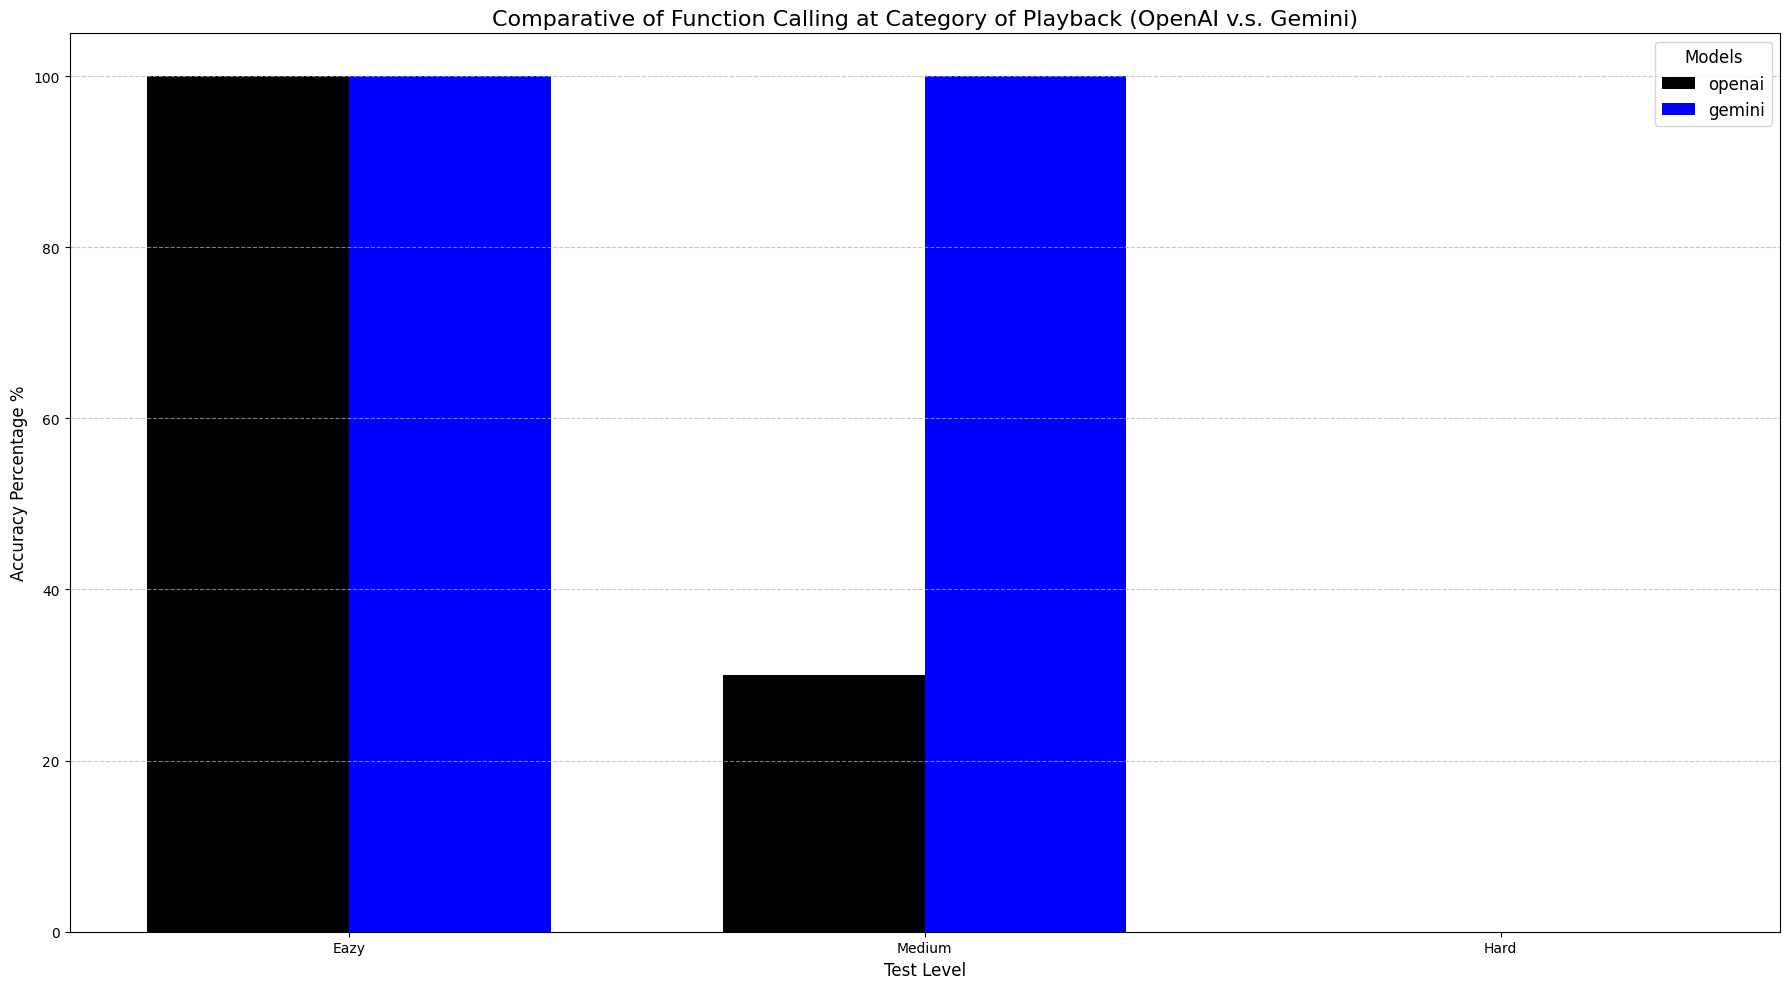

In [ ]:
plt.figure(figsize=(18, 10))

plt.bar(bar_axisx-0.35/2, [v*100 for v in openai_bars], width=0.35, label='openai', color='black')
plt.bar(bar_axisx+0.35/2, [v*100 for v in gemini_bars], width=0.35, label='gemini', color='blue')

plt.title('Comparative of Function Calling at Category of Playback (OpenAI v.s. Gemini)', fontsize=16)
plt.legend(title='Models', fontsize='large', title_fontsize='large')

plt.xlabel('Test Level', fontsize=12)
plt.xticks(bar_axisx, bar_category)

plt.ylabel('Accuracy Percentage %', fontsize=12)
# plt.yticks(np.arange(0, 20, 10), [f'{i}%' for i in np.arange(0, 20, 10)])

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

#### Agility

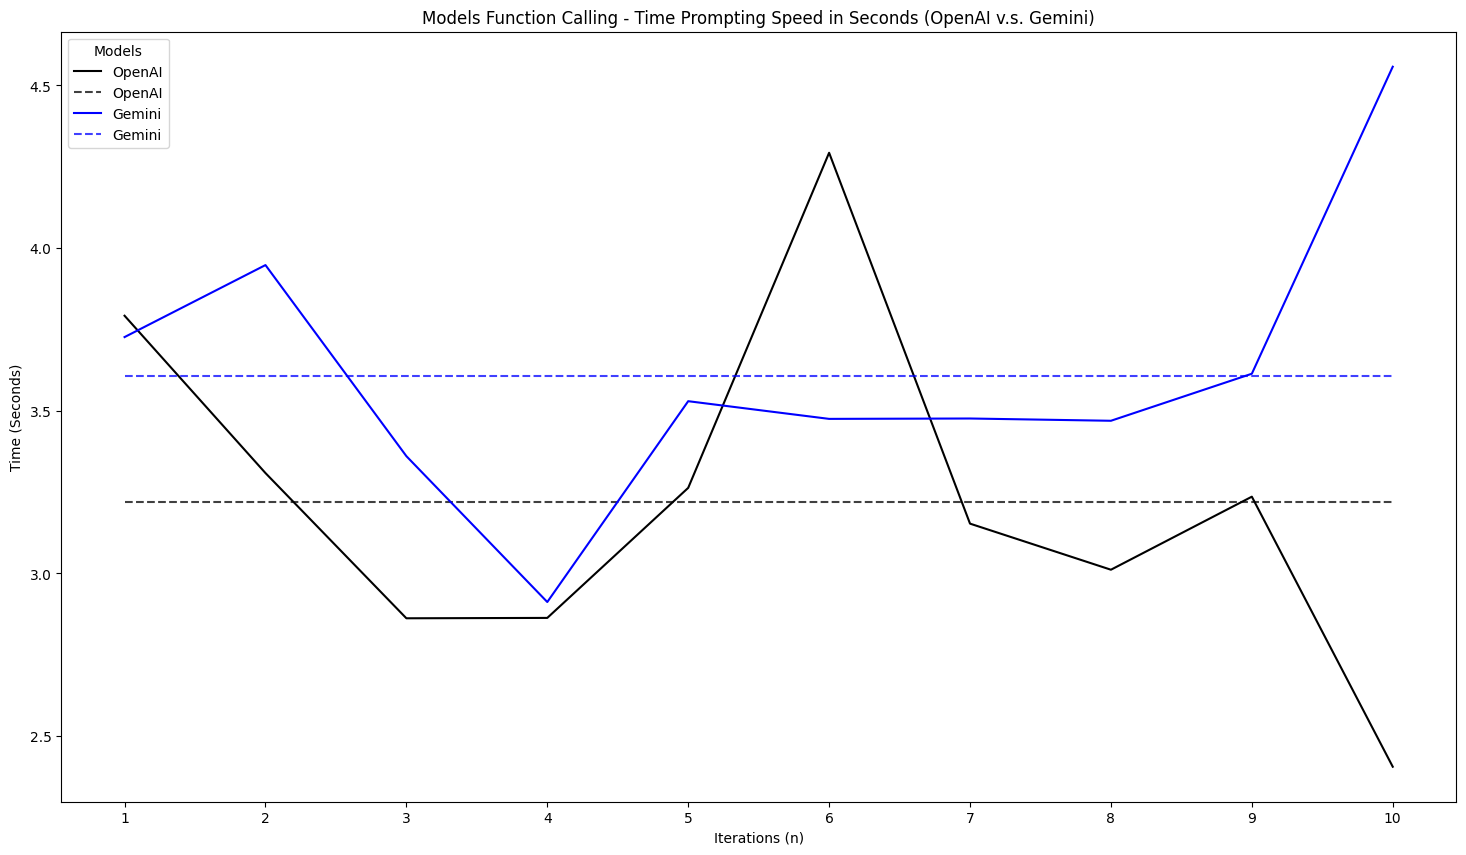

In [ ]:
plt.figure(figsize=(18, 10))

sns.lineplot(x=np.arange(1, len(openai_time)+1), y=openai_time, color='black', label='OpenAI')
sns.lineplot(x=np.arange(1, len(openai_time)+1), y=np.mean(openai_time), color='black', label='OpenAI', alpha=0.75, linestyle='--')

sns.lineplot(x=np.arange(1, len(gemini_time)+1), y=gemini_time, color='blue', label='Gemini')
sns.lineplot(x=np.arange(1, len(gemini_time)+1), y=np.mean(gemini_time), color='blue', label='Gemini', alpha=0.75, linestyle='--')

plt.title('Models Function Calling - Time Prompting Speed in Seconds (OpenAI v.s. Gemini)')
plt.legend(title='Models')
plt.xlabel('Iterations (n)')
plt.xticks(np.arange(1, len(gemini_time)+1), np.arange(1, len(gemini_time)+1))
plt.ylabel('Time (Seconds)')
plt.show()

## Metadata

In [ ]:
openai_fn_name_list = []
openai_diff_level_list = []
openai_diff_value_list = []

In [95]:
heatmap_fns_name = []
heatmap_fns_diff_level = []

openai_fns_diff_value = []
claude_fns_diff_value = []
gemini_fns_diff_value = []

openai_diff_level_sum = {
    'eazy': [],
    'medium': [],
    'hard': []
}
claude_diff_level_sum = {
    'eazy': [],
    'medium': [],
    'hard': []
}
gemini_diff_level_sum = {
    'eazy': [],
    'medium': [],
    'hard': []
}

openai_iteration_timing = []
claude_iteration_timing = []
gemini_iteration_timing = []

## Data

### Accuracy Calculation

In [96]:
def calculate_accuracy(list_cmd, model_name, fn_name):
    target_fn_name = fn_name.replace(' ', '_')
    model_inf_acc = []
    model_inf_speeds = []
    for cmd in list_cmd:
        try:
            if model_name == 'openai':
                fn_names, timing = invoke_openai(cmd)
            elif model_name == 'claude':
                fn_names, timing = invoke_claude(cmd)
            elif model_name == 'gemini':
                fn_names, timing = invoke_gemini(cmd)
        except Exception as e:
            print(f"Error processing command '{cmd}' with {model_name}: {e}")
            fn_names = []
            timing = None
        model_inf_acc.append(1) if target_fn_name in fn_names else model_inf_acc.append(0)
        model_inf_speeds.append(timing)
    accuracy_mean = np.mean(model_inf_acc) if model_inf_acc else None
    return accuracy_mean, model_inf_speeds

### Invoke & Processing

In [97]:
for fn_name in cmd_cat_difficulty.keys():
    # if fn_name == 'remove vocals':
    #     time.sleep(300) # connection tension relax
    for difficulty, list_cmd in cmd_cat_difficulty[fn_name].items():
        print(f'EPOCH function {fn_name}, diffculty: {difficulty}')

        heatmap_fns_name.append(fn_name) # heatmap axis-y
        heatmap_fns_diff_level.append(difficulty) # heatmap axis-x

        # heatmap axis-z/bar axis-y, line axis-y
        openai_acc, openai_speeds = calculate_accuracy(list_cmd, 'openai', fn_name) 
        claude_acc, claude_speeds = calculate_accuracy(list_cmd, 'claude', fn_name)
        gemini_acc, gemini_speeds = calculate_accuracy(list_cmd, 'gemini', fn_name)

        # heatmap (fn acc)
        openai_fns_diff_value.append(openai_acc)
        claude_fns_diff_value.append(claude_acc)
        gemini_fns_diff_value.append(gemini_acc)

        # bar (fn acc)
        openai_diff_level_sum[difficulty].append(openai_acc if openai_acc else 0)
        claude_diff_level_sum[difficulty].append(claude_acc if claude_acc else 0)
        gemini_diff_level_sum[difficulty].append(gemini_acc if gemini_acc else 0)

        # line (fn speed)
        openai_iteration_timing += (openai_speeds)
        claude_iteration_timing += (claude_speeds)
        gemini_iteration_timing += (gemini_speeds)


len(heatmap_fns_name), len(heatmap_fns_diff_level), len(claude_fns_diff_value)#, len(openai_fns_diff_value), len(gemini_fns_diff_value)

EPOCH function play, diffculty: eazy
START----
openai fn: Function(arguments='{}', name='play')
EXIT----
START----
openai fn: Function(arguments='{}', name='play')
EXIT----
START----
openai fn: Function(arguments='{}', name='play')
EXIT----
START----
claude say: I'll play the current track for you.
claude fn: ToolUseBlock(id='toolu_01R323xJBfkRwX981Y7CmB8W', input={}, name='play', type='tool_use')
EXIT----
START----
claude say: I'll help you with your music playback. However, your request is quite general. What would you like to do with the music? Here are some of the actions I can help you with:

- Play, pause, or restart the current track
- Adjust playback speed or tempo
- Skip ahead or go back in the track
- Loop specific sections
- Isolate or adjust specific instruments
- Use a metronome
- Transpose the music

Please let me know what specific action you'd like to take with the music, and I'll assist you right away.
EXIT----
START----
claude say: I'll help you control the music play

(147, 147, 147)

### Data Checkpoint

#### Heatmap Data

In [98]:
heatmap_data = {
    'function_name': heatmap_fns_name,
    'difficulty_level': heatmap_fns_diff_level,
    'openai_accuracy': openai_fns_diff_value,
    'claude_accuracy': claude_fns_diff_value,
    'gemini_accuracy': gemini_fns_diff_value,
}

heatmap_data_df = pd.DataFrame(heatmap_data)
heatmap_data_df

,function_name,difficulty_level,openai_accuracy,claude_accuracy,gemini_accuracy
0,play,eazy,1.000000,0.666667,1.0
1,play,medium,0.400000,0.600000,0.6
2,play,hard,0.666667,0.666667,1.0
3,pause,eazy,0.600000,0.600000,1.0
4,pause,medium,1.000000,0.200000,1.0
...,...,...,...,...,...
142,mark intro,medium,0.000000,0.000000,0.0
143,mark intro,hard,0.000000,0.000000,0.0
144,mark outro,eazy,0.000000,0.000000,0.0
145,mark outro,medium,0.000000,0.000000,0.0


In [99]:
heatmap_data_df.to_parquet('C:/Users/julio/Desktop/dev/artificial-intelligence/projects/function_call/data/heatmap_data_v3.parquet')

#### Bar Data

In [100]:
bar_data = {
    'eazy': [openai_diff_level_sum['eazy'], claude_diff_level_sum['eazy'], gemini_diff_level_sum['eazy']],
    'medium': [openai_diff_level_sum['medium'], claude_diff_level_sum['medium'], gemini_diff_level_sum['medium']],
    'hard': [openai_diff_level_sum['hard'], claude_diff_level_sum['hard'], gemini_diff_level_sum['hard']],
}

bar_data_df = pd.DataFrame(bar_data)
bar_data_df

,eazy,medium,hard
0,"[1.0, 0.6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0.4, 1.0, 1.0, 0.5, 0.3333333333333333, 0, 0....","[0.6666666666666666, 1.0, 0.8, 0.1666666666666..."
1,"[0.6666666666666666, 0.6, 0, 0, 0, 0, 0, 0, 0,...","[0.6, 0.2, 0.6666666666666666, 0, 0, 0, 0.6, 0...","[0.6666666666666666, 1.0, 1.0, 0.3333333333333..."
2,"[1.0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0.6, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."


In [101]:
bar_data_df.to_parquet('C:/Users/julio/Desktop/dev/artificial-intelligence/projects/function_call/data/v3/bar_data_v3.parquet')

In [120]:
bar_data_df_2 = bar_data_df.copy()

for col in bar_data_df.columns:
    for idx, row in bar_data_df.iterrows():
        x_list = row[col]
        sum_v = []
        for v in x_list:
            if v > 0:
                sum_v.append(v)
        bar_data_df_2.loc[idx, col] = np.mean(sum_v)*100

bar_data_df_2

,eazy,medium,hard
0,80.0,53.666667,50.18759
1,63.333333,66.736111,64.908964
2,100.0,98.787879,100.0


In [121]:
bar_data_df_2.to_parquet('C:/Users/julio/Desktop/dev/artificial-intelligence/projects/function_call/data/v3/bar_data2_v3.parquet')

#### Line Data

In [102]:
line_data = {
    'openai_speed': openai_iteration_timing,
    'claude_speed': claude_iteration_timing,
    'gemini_speed': gemini_iteration_timing,
}

line_data_df = pd.DataFrame(line_data)
line_data_df

,openai_speed,claude_speed,gemini_speed
0,1.770318,2.647773,0.953572
1,1.099600,5.129597,0.679864
2,0.896211,2.379477,0.724087
3,1.324826,2.862030,1.552969
4,1.113894,2.787290,0.659855
...,...,...,...
391,2.274585,5.357661,1.279628
392,2.527353,6.879610,1.279920
393,1.627192,12.680502,1.353143
394,2.278231,4.312844,2.150728


In [103]:
line_data_df.to_parquet('C:/Users/julio/Desktop/dev/artificial-intelligence/projects/function_call/data/v3/line_data_v3.parquet')

## Plot

### Heatmap

#### OpenAI

In [104]:
openai_heatmap_df = heatmap_data_df.pivot(index='function_name', columns='difficulty_level', values='openai_accuracy')
openai_heatmap_df = openai_heatmap_df[['eazy', 'medium', 'hard']]

openai_heatmap_df.head()

difficulty_level,eazy,medium,hard
function_name,,,
clear loop,NaN,0.25,0.750000
compare takes,NaN,0.50,0.166667
count in,NaN,0.00,0.428571
from the top,NaN,1.00,0.800000
go back,NaN,0.50,0.166667


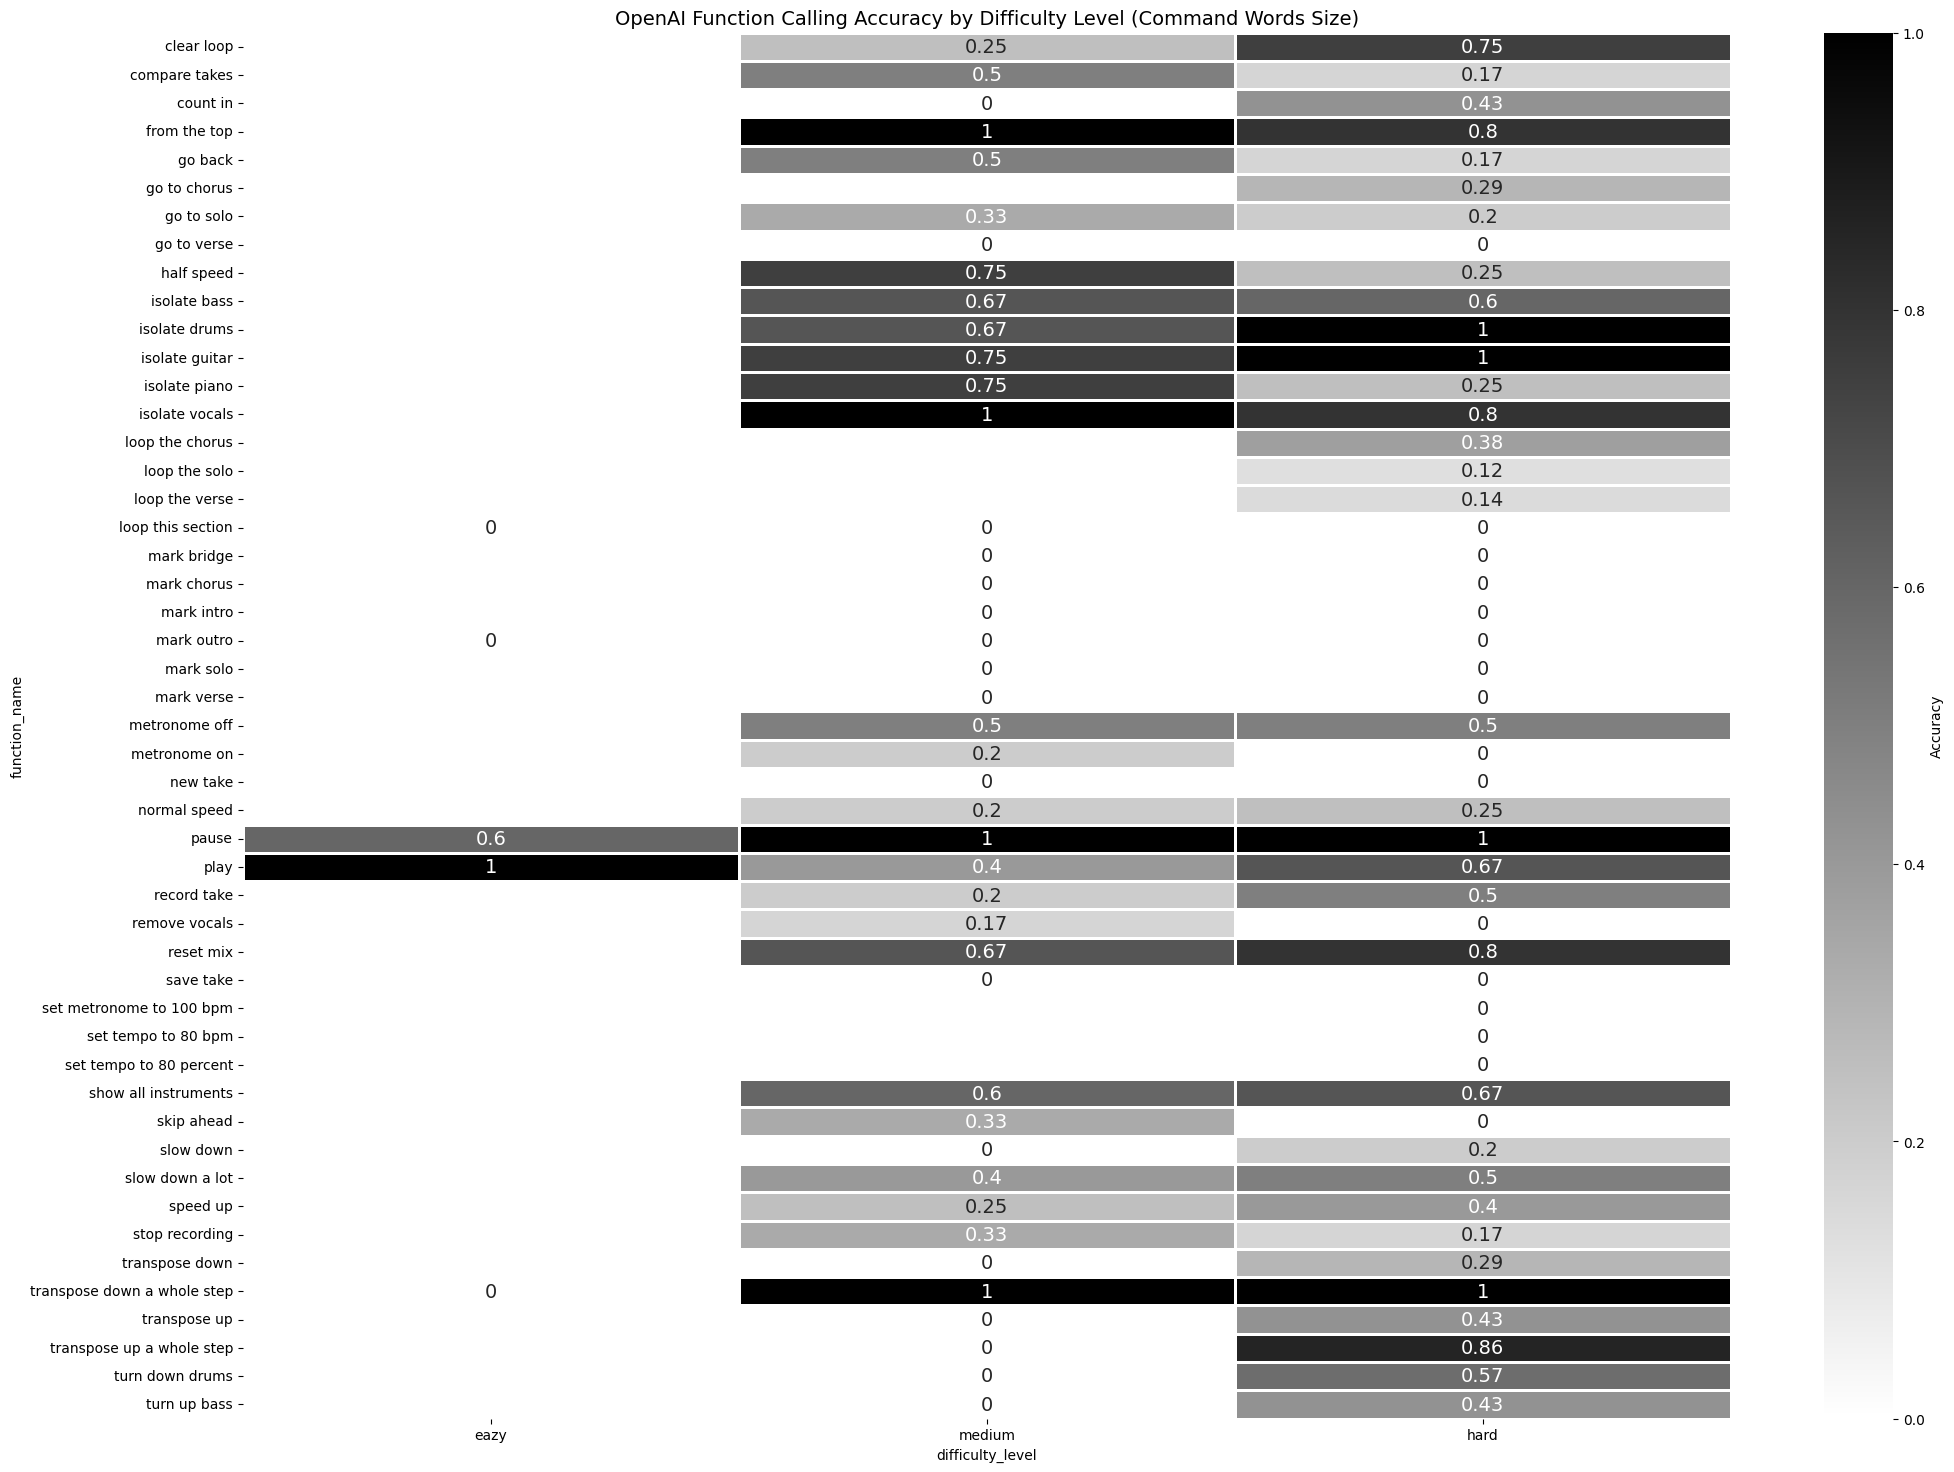

In [134]:
plt.figure(figsize=(24, 18))
sns.heatmap(
    openai_heatmap_df, 
    mask=openai_heatmap_df.isna(), annot=True, annot_kws={"size": 14},
    cmap='binary', cbar=True, cbar_kws={'label': 'Accuracy'},
    linewidths=2, linecolor='white', square=False
    )
plt.title('OpenAI Function Calling Accuracy by Difficulty Level (Command Words Size)', fontsize=14)
plt.show()

#### Claude

In [106]:
claude_heatmap_df = heatmap_data_df.pivot(index='function_name', columns='difficulty_level', values='claude_accuracy')
claude_heatmap_df = claude_heatmap_df[['eazy', 'medium', 'hard']]

claude_heatmap_df.head()

difficulty_level,eazy,medium,hard
function_name,,,
clear loop,NaN,0.500000,0.750000
compare takes,NaN,0.500000,0.500000
count in,NaN,0.000000,0.571429
from the top,NaN,0.666667,1.000000
go back,NaN,0.000000,0.333333


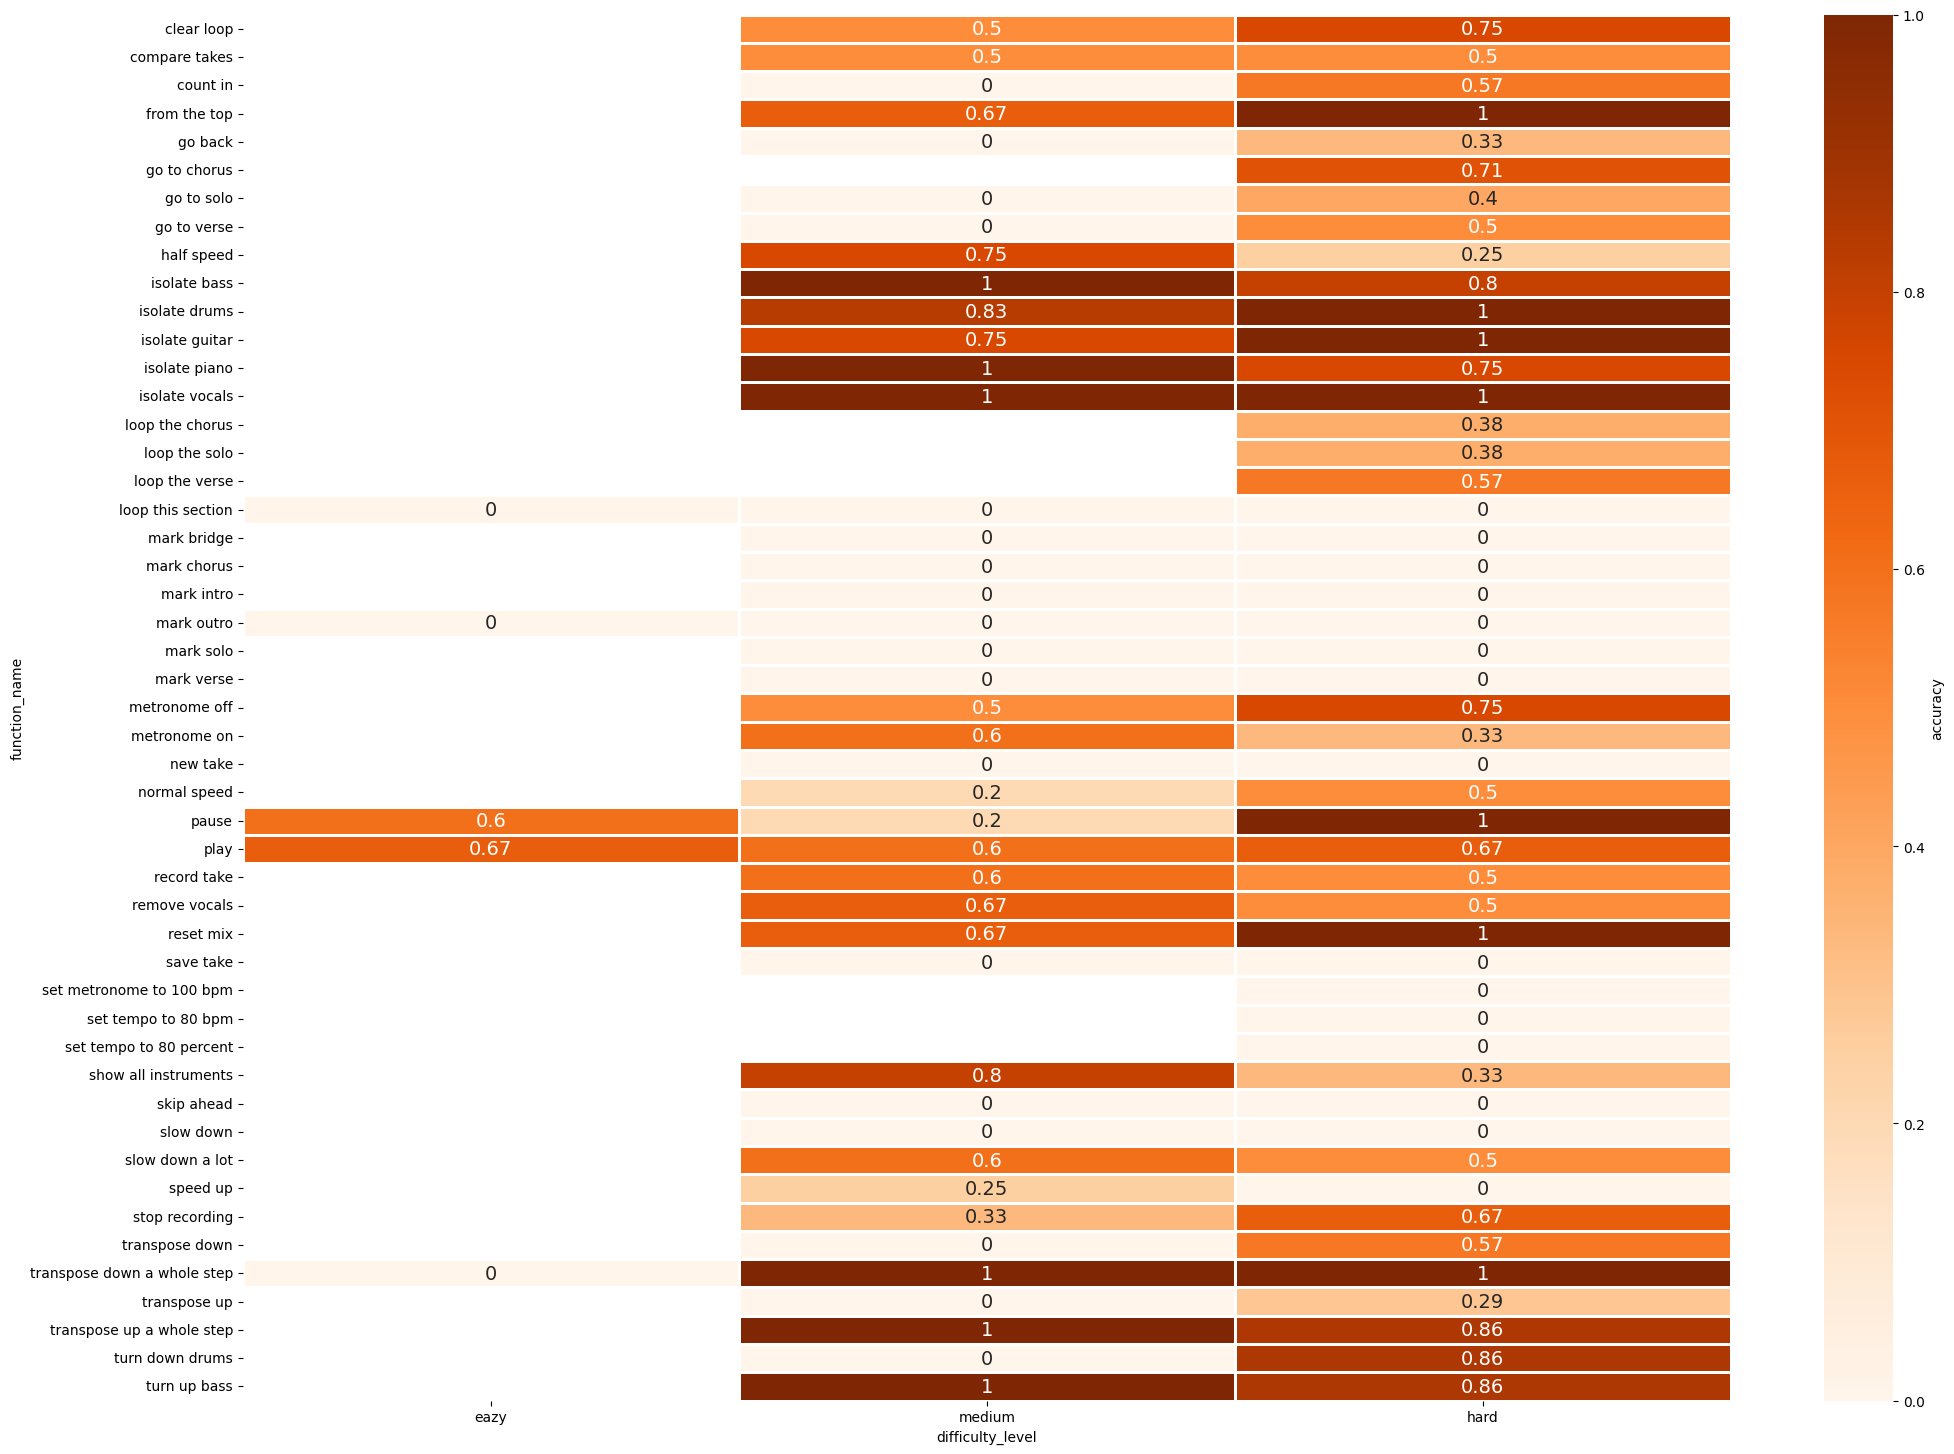

In [107]:
plt.figure(figsize=(24, 18))
sns.heatmap(
    claude_heatmap_df,
    cmap='Oranges',
    cbar=True,
    cbar_kws={'label': 'accuracy'},
    annot=True,
    annot_kws={'size': 14},
    mask=claude_heatmap_df.isna(),
    square=False,
    linewidth=2,
    linecolor='white',
)
plt.show()

#### Gemini

In [108]:
gemini_heatmap_df = heatmap_data_df.pivot(index='function_name', columns='difficulty_level', values='gemini_accuracy')
gemini_heatmap_df = gemini_heatmap_df[['eazy', 'medium', 'hard']]

gemini_heatmap_df.head()

difficulty_level,eazy,medium,hard
function_name,,,
clear loop,NaN,1.0,1.0
compare takes,NaN,1.0,1.0
count in,NaN,1.0,1.0
from the top,NaN,1.0,1.0
go back,NaN,1.0,1.0


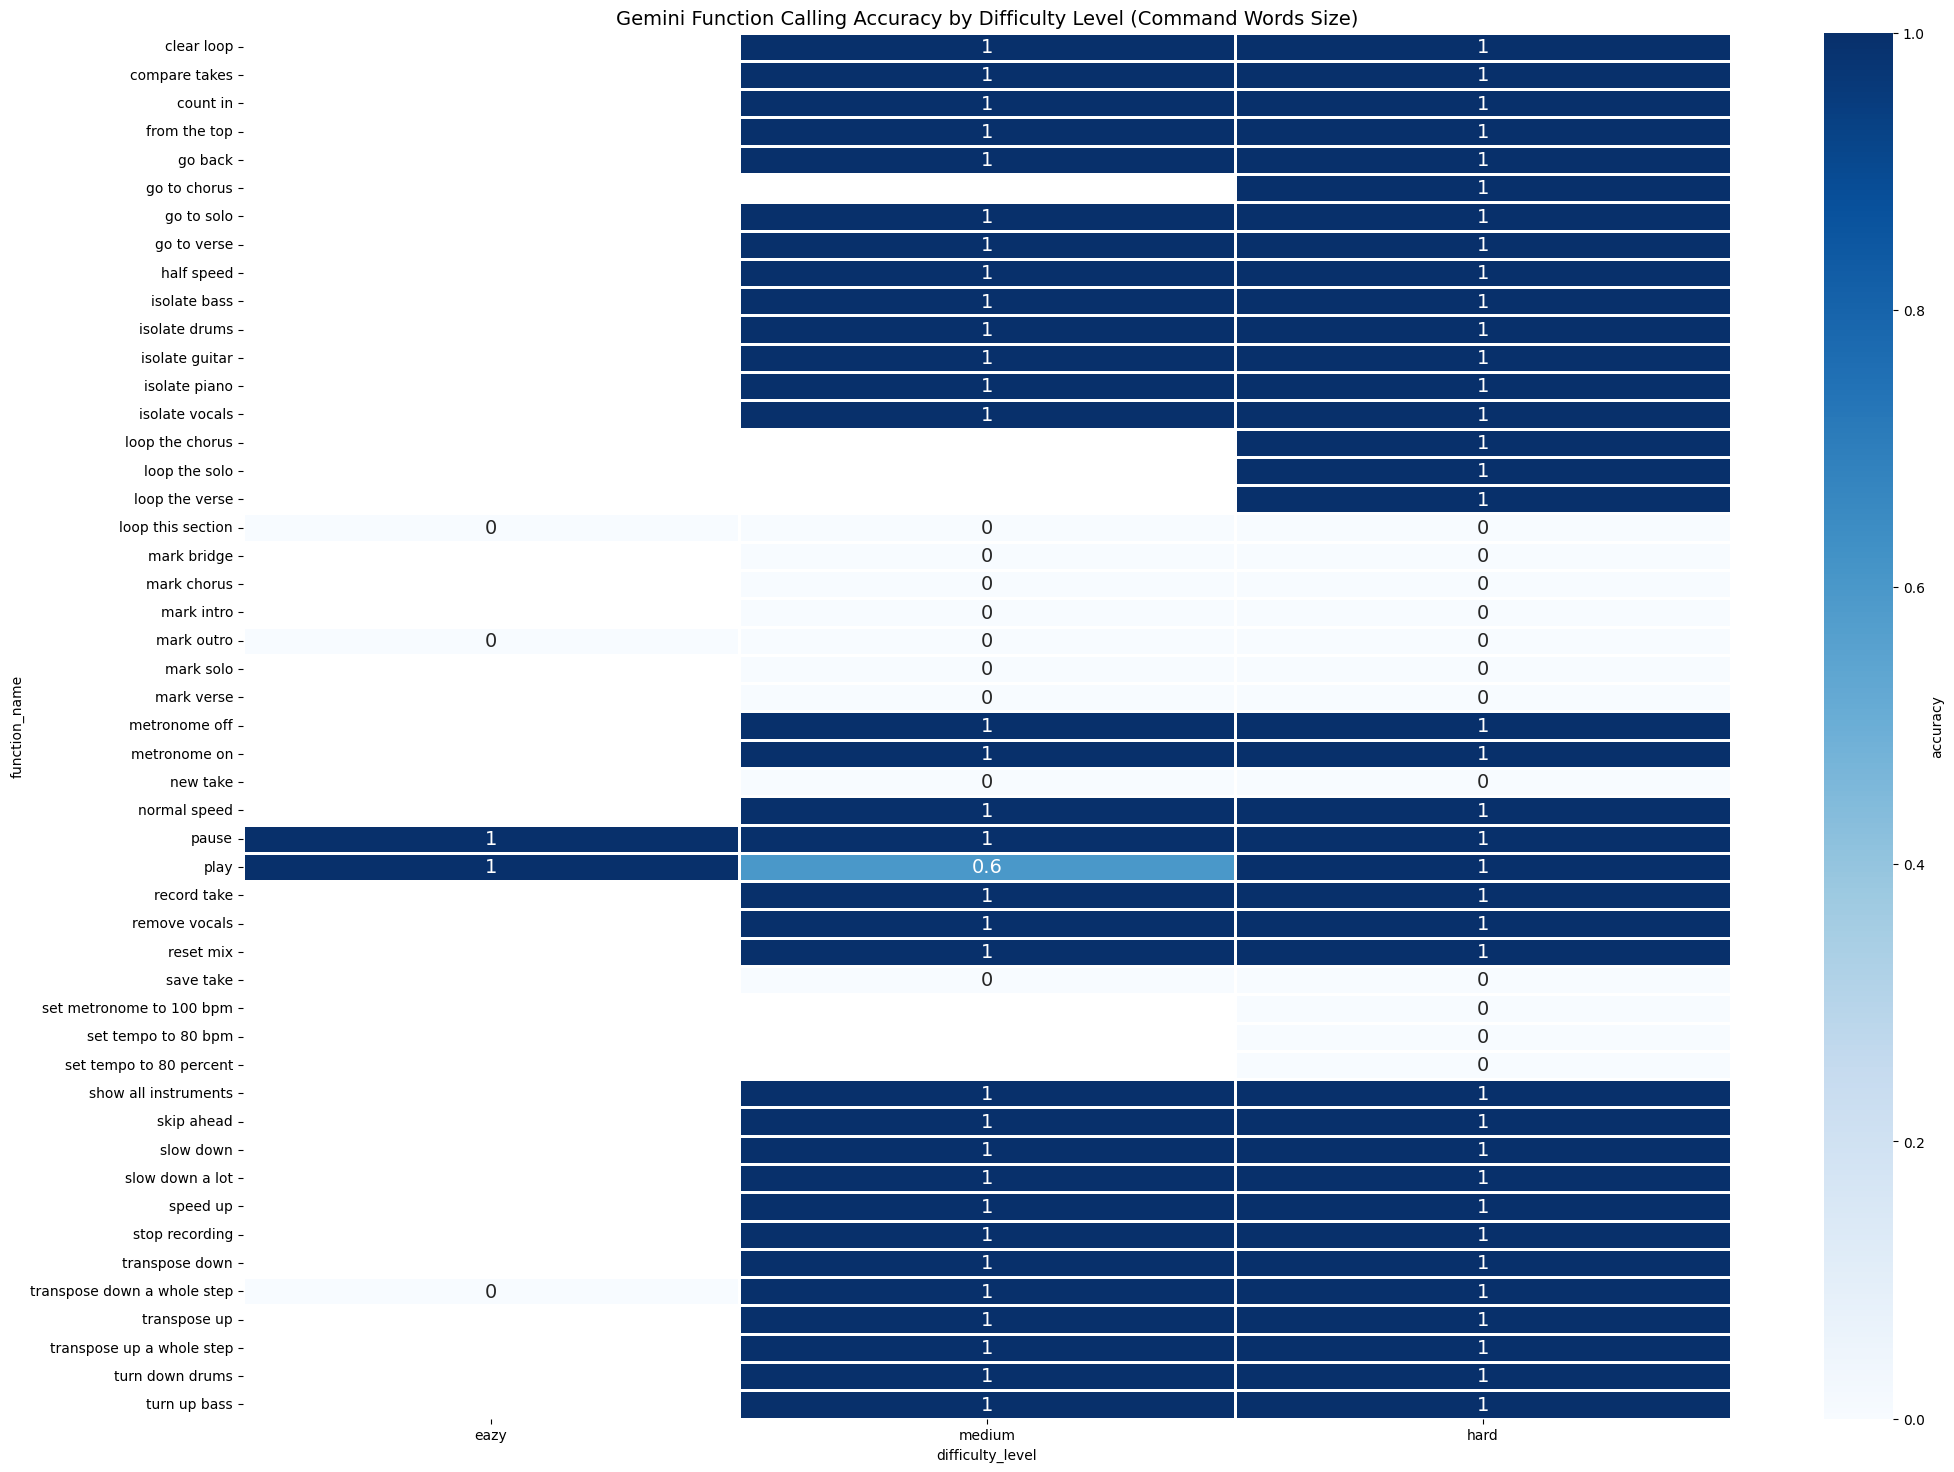

In [135]:
plt.figure(figsize=(24, 18))
sns.heatmap(
    gemini_heatmap_df,
    cmap='Blues',
    cbar=True,
    cbar_kws={'label': 'accuracy'},
    annot=True,
    annot_kws={'size': 14},
    mask=claude_heatmap_df.isna(),
    square=False,
    linewidths=2,
    linecolor='white',
)
plt.title('Gemini Function Calling Accuracy by Difficulty Level (Command Words Size)', fontsize=14)
plt.show()

### Bar

In [122]:
labels=bar_data_df_2.columns.to_list()
axisx = np.arange(len(labels))

axisx

array([0, 1, 2])

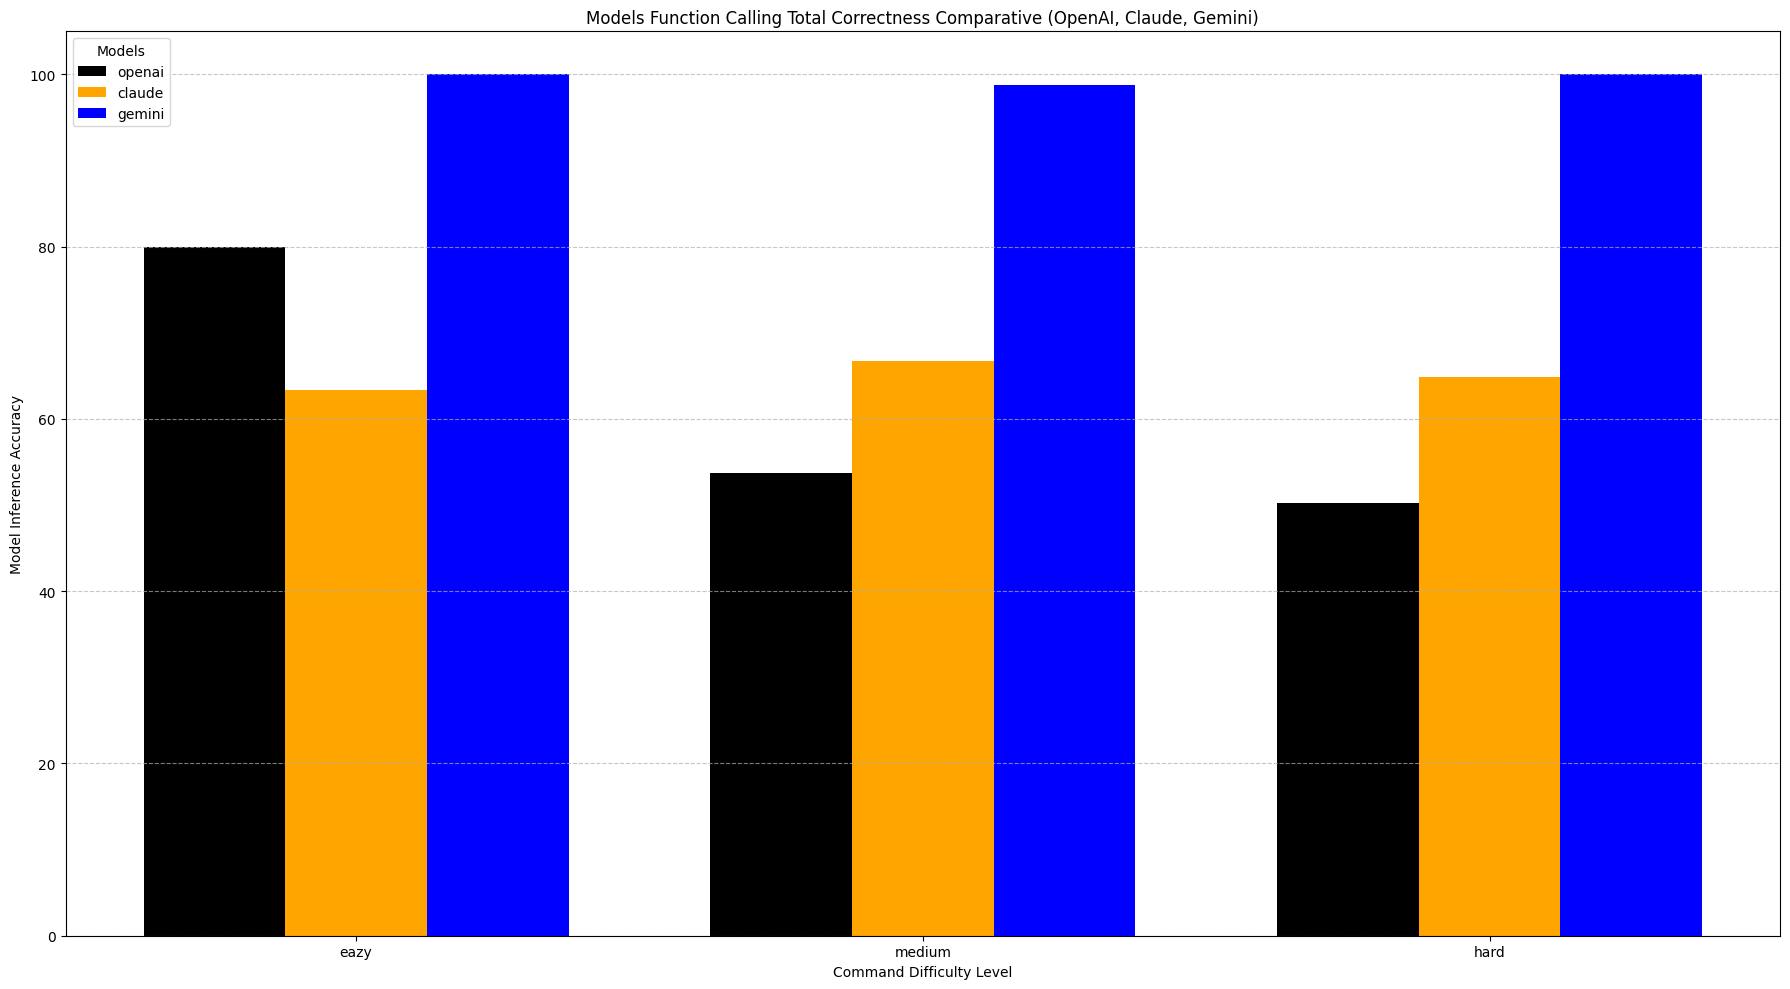

In [131]:
fig, axes = plt.subplots(figsize=(18, 10))

bar_width = 0.25
axes.bar(x=axisx-bar_width, height=bar_data_df_2.iloc[0, :], width=bar_width, label='openai', color='black')
axes.bar(x=axisx, height=bar_data_df_2.iloc[1, :], width=bar_width, label='claude', color='orange')
axes.bar(x=axisx+bar_width, height=bar_data_df_2.iloc[2, :], width=bar_width, label='gemini', color='blue')
axes.grid(axis='y', linestyle='--', alpha=0.7)

axes.set_xlabel('Commands Difficulty')
axes.set_ylabel('Total Correctness')
axes.legend()


axes.set_xlabel('Command Difficulty Level')
axes.set_xticks(axisx, labels)

axes.set_ylabel('Model Inference Accuracy')

plt.title('Models Function Calling Total Correctness Comparative (OpenAI, Claude, Gemini)')
plt.legend(title='Models')
plt.tight_layout()
plt.show()

### Line

In [124]:
type(line_data['claude_speed'])

list

In [125]:
for model in line_data:
    for idx, value in enumerate(line_data[model]):
        if value == None:
            line_data[model][idx] = line_data[model][idx-1]

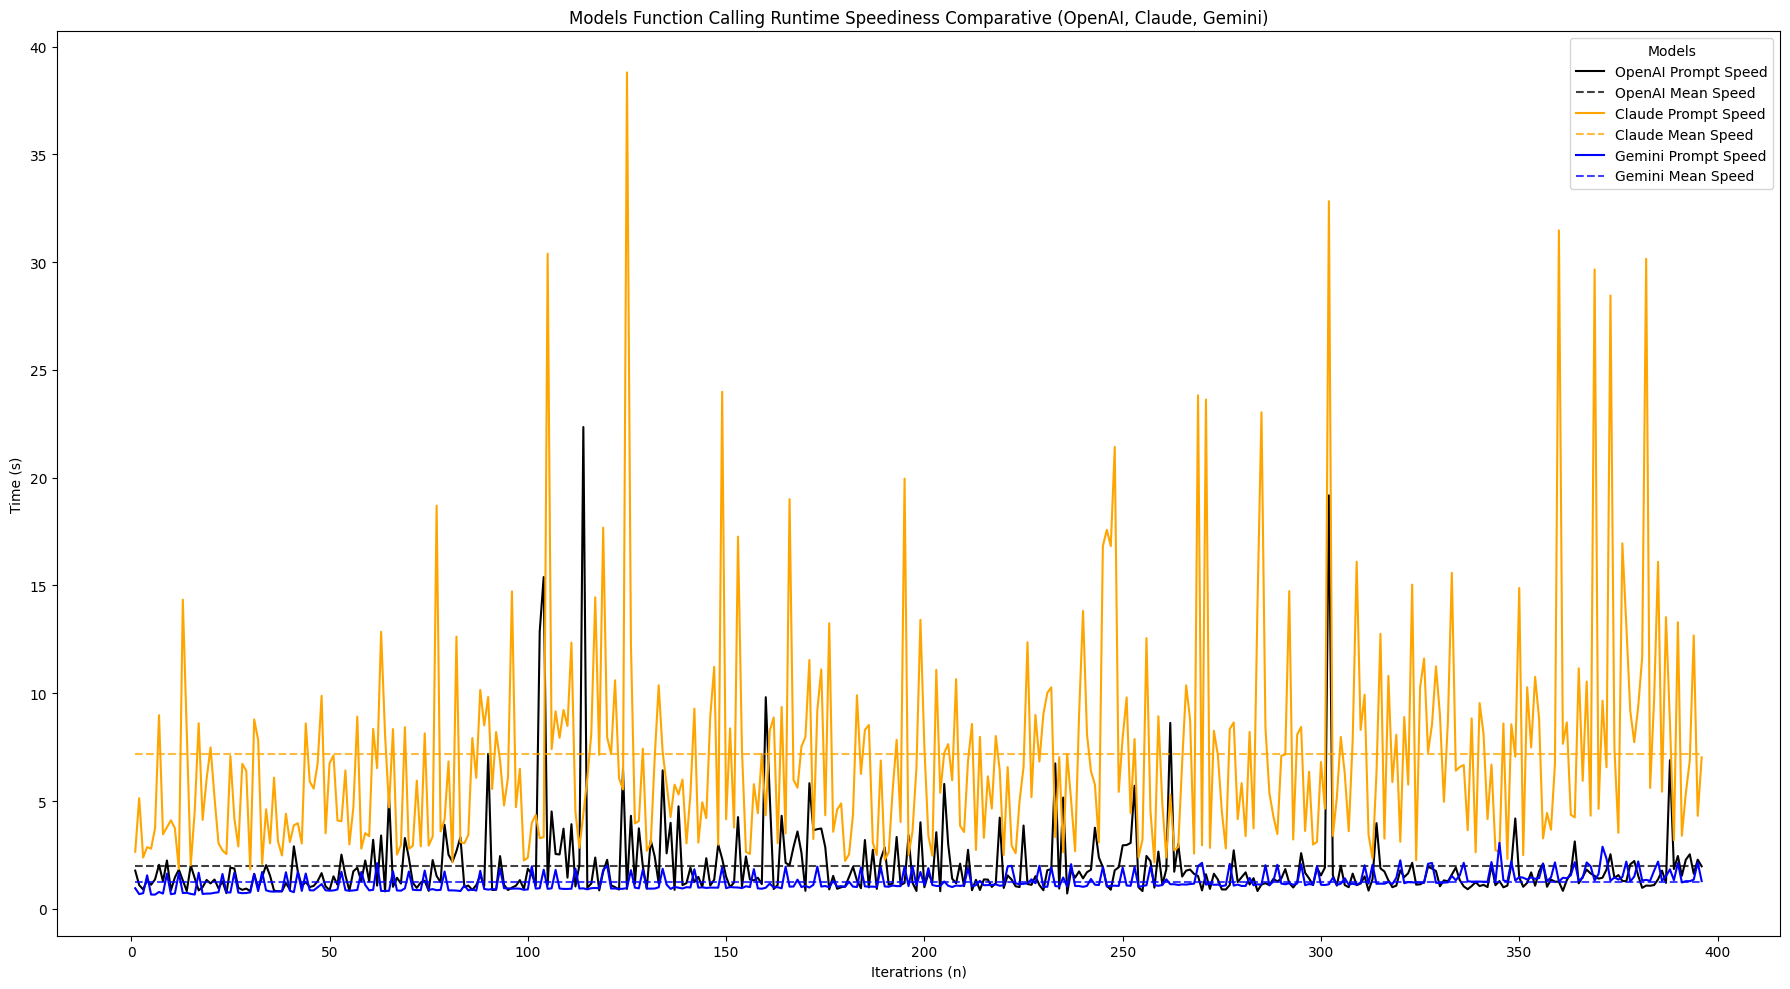

In [126]:
plt.figure(figsize=(18, 10))

sns.lineplot(x=np.arange(1, len(line_data['openai_speed'])+1), y=line_data['openai_speed'], color='black', label='OpenAI Prompt Speed')
sns.lineplot(
    x=np.arange(1, len(line_data['openai_speed'])+1), 
    y=np.mean(line_data['openai_speed']), color='black', label='OpenAI Mean Speed', alpha=0.75, linestyle='--')

sns.lineplot(x=np.arange(1, len(line_data['claude_speed'])+1), y=line_data['claude_speed'], color='orange', label='Claude Prompt Speed')
sns.lineplot(
    x=np.arange(1, len(line_data['claude_speed'])+1), 
    y=np.mean(line_data['claude_speed']), color='orange', label='Claude Mean Speed', alpha=0.75, linestyle='--')

sns.lineplot(x=np.arange(1, len(line_data['gemini_speed'])+1), y=line_data['gemini_speed'], color='blue', label='Gemini Prompt Speed')
sns.lineplot(
    x=np.arange(1, len(line_data['gemini_speed'])+1), 
    y=np.mean(line_data['gemini_speed']), color='blue', label='Gemini Mean Speed', alpha=0.75, linestyle='--')

plt.title('Models Function Calling Runtime Speediness Comparative (OpenAI, Claude, Gemini)')
plt.legend(title='Models')

plt.xlabel('Iteratrions (n)')

plt.ylabel('Time (s)')

plt.tight_layout()
plt.show()

In [130]:
openai_series = pd.Series(line_data['openai_speed'])
claude_series = pd.Series(line_data['claude_speed'])
gemini_series = pd.Series(line_data['gemini_speed'])

window = 3
openai_smooth = openai_series.rolling(window=window, center=True).mean()
claude_smooth = claude_series.rolling(window=window, center=True).mean()
gemini_smooth = gemini_series.rolling(window=window, center=True).mean()

openai_smooth, openai_series

(0           NaN
 1      1.255376
 2      1.106879
 3      1.111644
 4      1.267679
          ...   
 391    2.110652
 392    2.143043
 393    2.144258
 394    1.958491
 395         NaN
 Length: 396, dtype: float64,
 0      1.770318
 1      1.099600
 2      0.896211
 3      1.324826
 4      1.113894
          ...   
 391    2.274585
 392    2.527353
 393    1.627192
 394    2.278231
 395    1.970049
 Length: 396, dtype: float64)

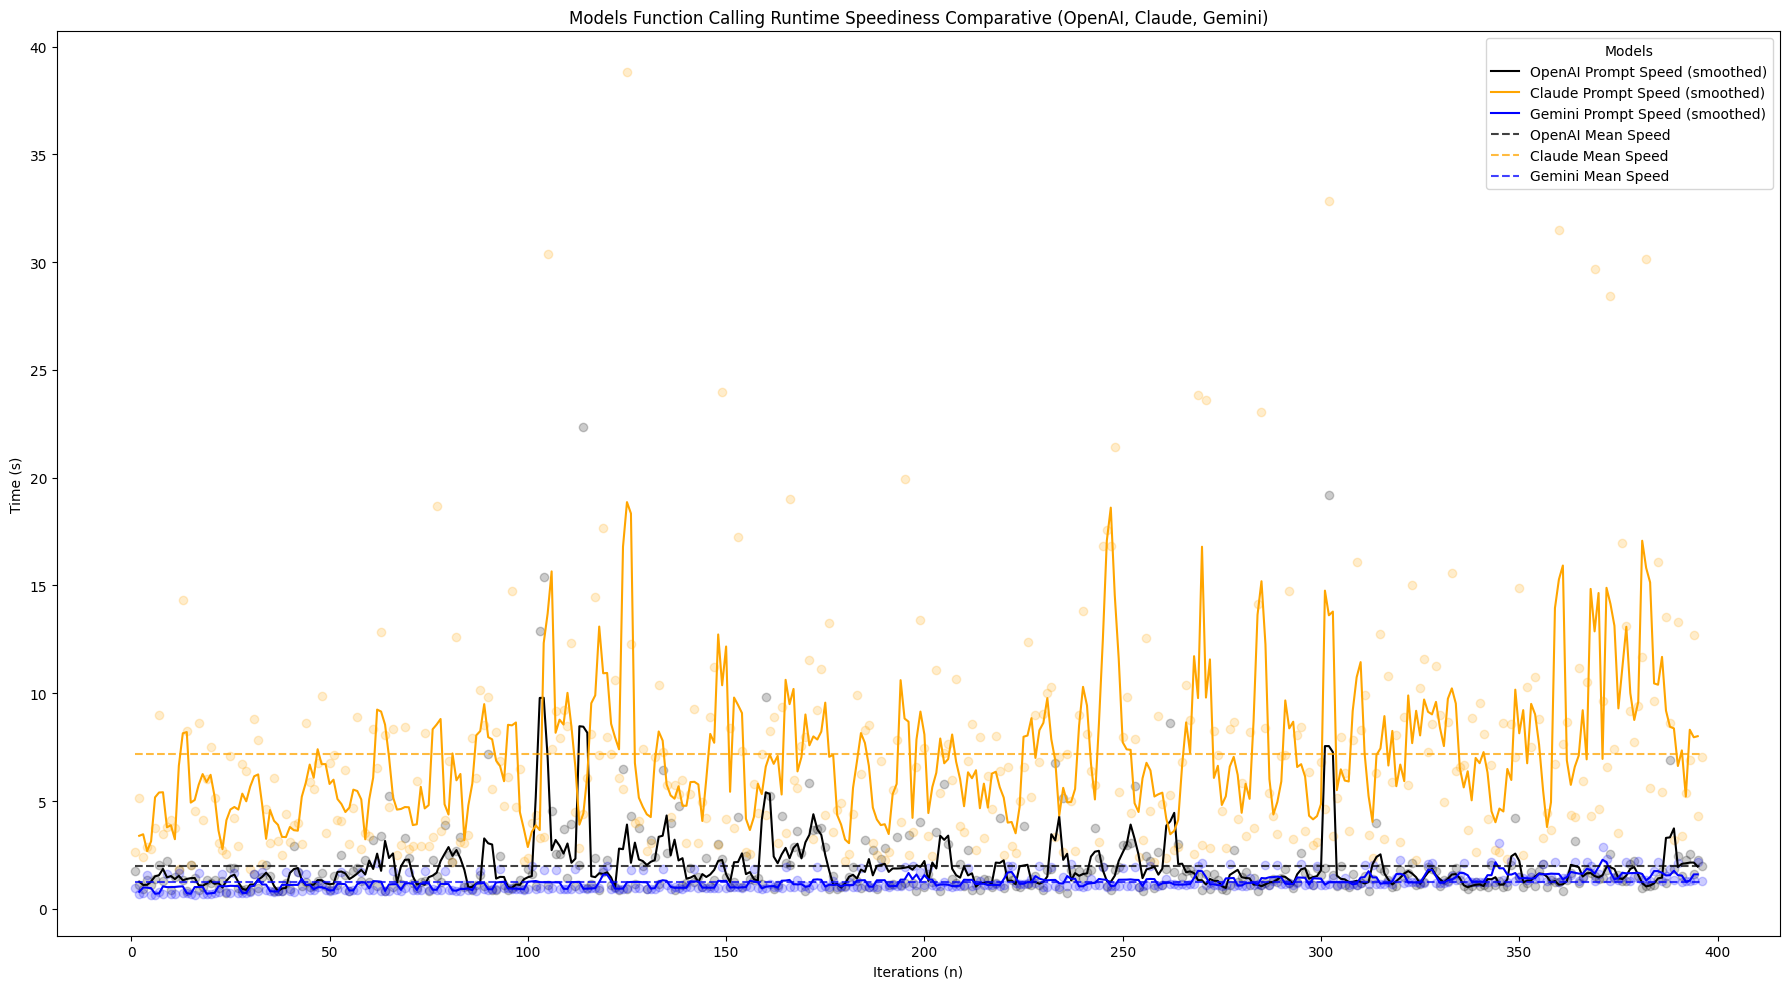

In [ ]:
plt.figure(figsize=(18, 10))

sns.lineplot(x=np.arange(1, len(line_data['openai_speed'])+1), y=openai_smooth, 
             color='black', label='OpenAI Prompt Speed (smoothed)')
sns.lineplot(x=np.arange(1, len(line_data['claude_speed'])+1), y=claude_smooth, 
             color='orange', label='Claude Prompt Speed (smoothed)')
sns.lineplot(x=np.arange(1, len(line_data['gemini_speed'])+1), y=gemini_smooth, 
             color='blue', label='Gemini Prompt Speed (smoothed)')

plt.scatter(np.arange(1, len(line_data['openai_speed'])+1), line_data['openai_speed'], 
            color='black', alpha=0.2)
plt.scatter(np.arange(1, len(line_data['claude_speed'])+1), line_data['claude_speed'], 
            color='orange', alpha=0.2)
plt.scatter(np.arange(1, len(line_data['gemini_speed'])+1), line_data['gemini_speed'], 
            color='blue', alpha=0.2)

sns.lineplot(x=np.arange(1, len(line_data['openai_speed'])+1), 
             y=np.mean(line_data['openai_speed']), color='black', 
             label='OpenAI Mean Speed', alpha=0.75, linestyle='--')
sns.lineplot(x=np.arange(1, len(line_data['claude_speed'])+1), 
             y=np.mean(line_data['claude_speed']), color='orange', 
             label='Claude Mean Speed', alpha=0.75, linestyle='--')
sns.lineplot(x=np.arange(1, len(line_data['gemini_speed'])+1), 
             y=np.mean(line_data['gemini_speed']), color='blue', 
             label='Gemini Mean Speed', alpha=0.75, linestyle='--')

plt.title('Models Function Calling Runtime Speediness Comparative (OpenAI, Claude, Gemini)')
plt.legend(title='Models')
plt.xlabel('Iterations (n)')
plt.ylabel('Time (s)')
plt.tight_layout()
plt.show()

# Test (Audio-Prompt)

## Whisper

In [ ]:
import speech_recognition as sr

r = sr.Recognizer()

## Test (OpenAI)

In [ ]:
# while(1):
#     try:
#         with sr.Microphone() as src:
#             print('Listening...')
#             r.adjust_for_ambient_noise(src, duration=0.2)
#             audio = r.listen(src)
#             text = r.recognize_google(audio)
#             print(text)
#             if text in audio_cmd:
#                 print(f'Executing command: {text}')
#                 invoke_openai(text.lower())
#             elif text in ['close', 'finish']:
#                 print('Exiting now!')
#                 break
#     except sr.RequestError:
#         print('Request error!')
#     except sr.UnknownValueError:
#         print('Unkown value error!')

Listening...
hello


NameError: name 'audio_cmd' is not defined

## Test (Gemini)

In [ ]:
# while(1):
#     try:
#         with sr.Microphone() as src:
#             print('Listening...')
#             r.adjust_for_ambient_noise(src, duration=0.2)
#             audio = r.listen(src)
#             text = r.recognize_google(audio)
#             print(text)
#             if text in audio_cmd:
#                 print(f'Executing command: {text}')
#                 invoke_gemini(text.lower())
#             elif text in ['close', 'finish']:
#                 print('Exiting now!')
#                 break
#     except sr.RequestError:
#         print('Request error!')
#     except sr.UnknownValueError:
#         print('Unkown value error!')

Listening...
close
Exiting now!
